# Bye-Bayes Network project
## Introduction
The aim of the proposed project is to analyze the set of reasons that lead people of all ages and genders to death.
The probabilities relating to the events have been extrapolated from official documents that can be consulted at the following links according to the specific category of event:
<ol>
    <li>  <b>Most of the probabilities:</b> <a>https://www.thelancet.com/cms/10.1016/S0140-6736(18)32203-7/attachment/0aaa0b77-f3e8-452c-a5c6-4debeaeae82d/mmc2.pdf</a></br>
    <b>And the related study:</b> <a>https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(18)32203-7/fulltext</a>;
    <li>  <b>Probability of fall:</b> <a>https://injuryprevention.bmj.com/content/injuryprev/11/2/115.full.pdf</a>;
    <li>  <b>Probability of natural disasters:</b> <a>https://ourworldindata.org/natural-disasters</a>;
    <li>  <b>Probability of poisoning:</b> <a>https://www.poison.org/poison-statistics-national</a>;
    <li>  <b>Probability of self-harm:</b> <a>https://ourworldindata.org/suicide</a>;
    <li>  <b>Probability of malignancy (neoplasms):</b> <a>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4544764/</a>;
    <li>  <b>Probability of respiratory infections:</b> <a>https://onlinelibrary.wiley.com/doi/epdf/10.1111/irv.12639</a>;
    <li>  <b>Probability of cardiovascular disease:</b> <a>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7847085/</a>;
    <li>  <b>Correlation between cardiovascular disease and possibility of fall:</b> <a>https://www.ahajournals.org/doi/full/10.1161/HCQ.0000000000000108?rfr_dat=cr_pub++0pubmed&url_ver=Z39.88-2003&rfr_id=ori%3Arid%3Acrossref.org</a>;
    <li>  <b>Study about Covid-19 infectivity and relation with respiratory infections:</b> <a>https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2777314</a>;
</ol>

In particular, from the study in the first element of the list we have collected the possibilities of suffering fatal damage from one of the causes, while the following links refer to the chances of single unfortunate events taking place.

In [1]:
import pgmpy as pg
from pgmpy.readwrite import BIFReader
import networkx as nx
from pgmpy.models import BayesianModel, BayesianNetwork
from networkx.drawing.nx_pydot import graphviz_layout
import pydot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
import itertools

/home/stefano/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Graph printing and png creation

def draw_graph(model,name,color="green", title=""):
    p = graphviz_layout(model, prog="dot")
    plt.figure(figsize=(15, 8))
    nx.draw(model, with_labels=True, pos=p, node_size=1400, node_color=color, font_size=6)
    if title != "":
        plt.title(title)
    plt.savefig('./img/' + name + '.png')
    plt.show()

## Models
Here are the two main models we rely on within the project, both built manually. </br>
The difference between the two models is that in the second an extra "Covid" node was added to analyze the variations that the spread of SARS-CoV-2 has brought in the area of ​​respiratory tract infections and number of deaths.

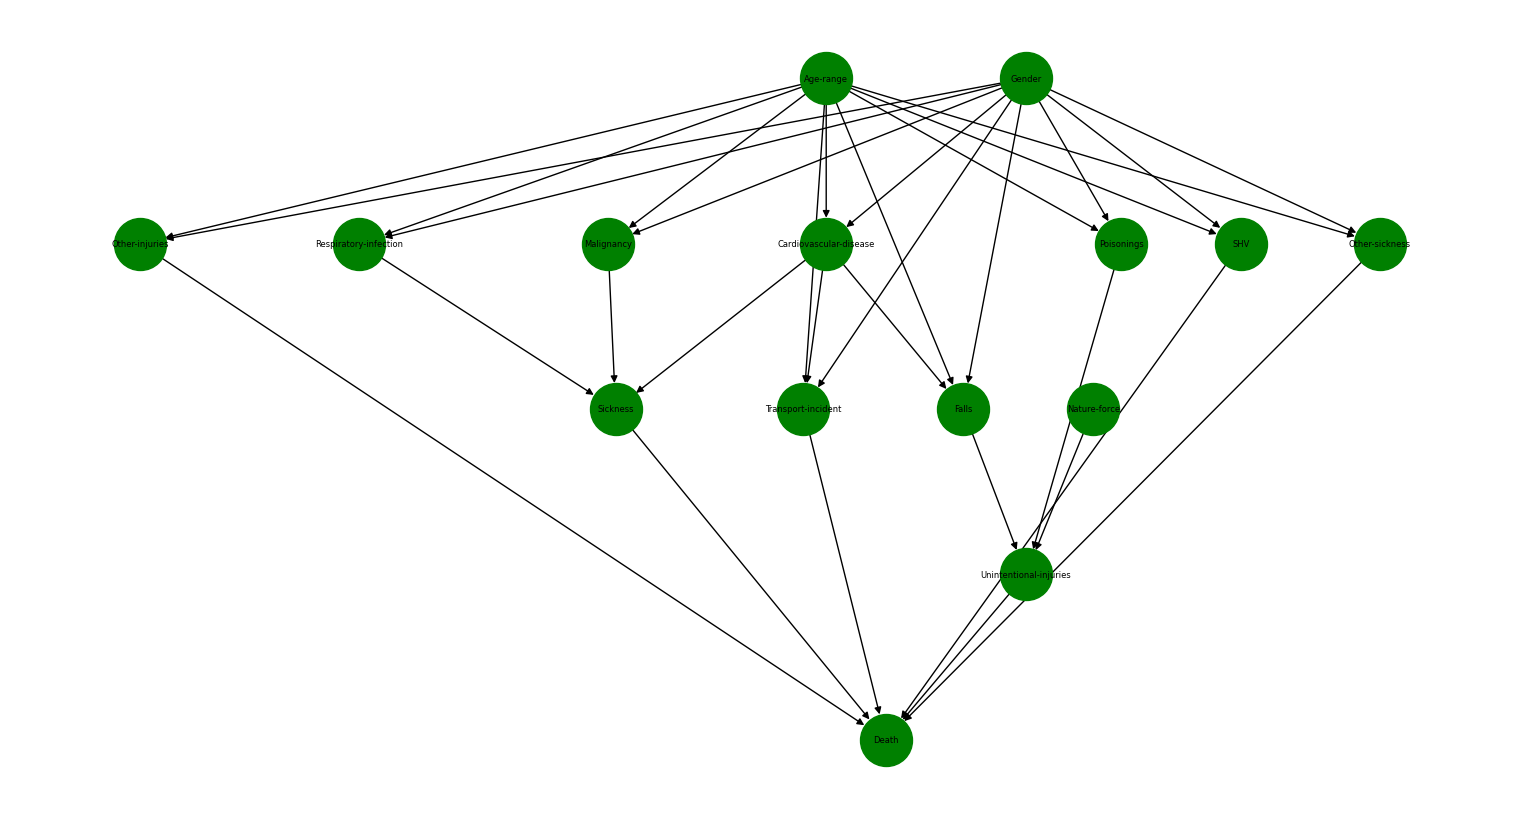

In [3]:
# Manual constructed model

mc_model = BayesianNetwork([
    ('Age-range', 'Other-injuries'), ('Age-range', 'Falls'), ('Age-range', 'Poisonings'), ('Age-range', 'Transport-incident'), ('Age-range', 'SHV'),
    ('Age-range', 'Respiratory-infection'), ('Age-range', 'Malignancy'), ('Age-range', 'Other-sickness'), ('Age-range', 'Cardiovascular-disease'),
    ('Gender', 'Other-injuries'), ('Gender', 'Falls'), ('Gender', 'Poisonings'), ('Gender', 'Transport-incident'), ('Gender', 'SHV'), 
    ('Gender', 'Respiratory-infection'), ('Gender', 'Malignancy'), ('Gender', 'Other-sickness'), ('Gender', 'Cardiovascular-disease'),
    ('Cardiovascular-disease', 'Falls'), ('Cardiovascular-disease', 'Transport-incident'), ('Cardiovascular-disease', 'Sickness'), 
    ('Other-injuries', 'Death'), ('Unintentional-injuries', 'Death'), ('Falls', 'Unintentional-injuries'), ('Poisonings', 'Unintentional-injuries'), 
    ('Nature-force', 'Unintentional-injuries'), ('Transport-incident', 'Death'), ('SHV', 'Death'), ('Respiratory-infection', 'Sickness'), 
    ('Malignancy', 'Sickness'), ('Other-sickness', 'Death'), ('Sickness', 'Death')
])

draw_graph(mc_model,"mc_model")

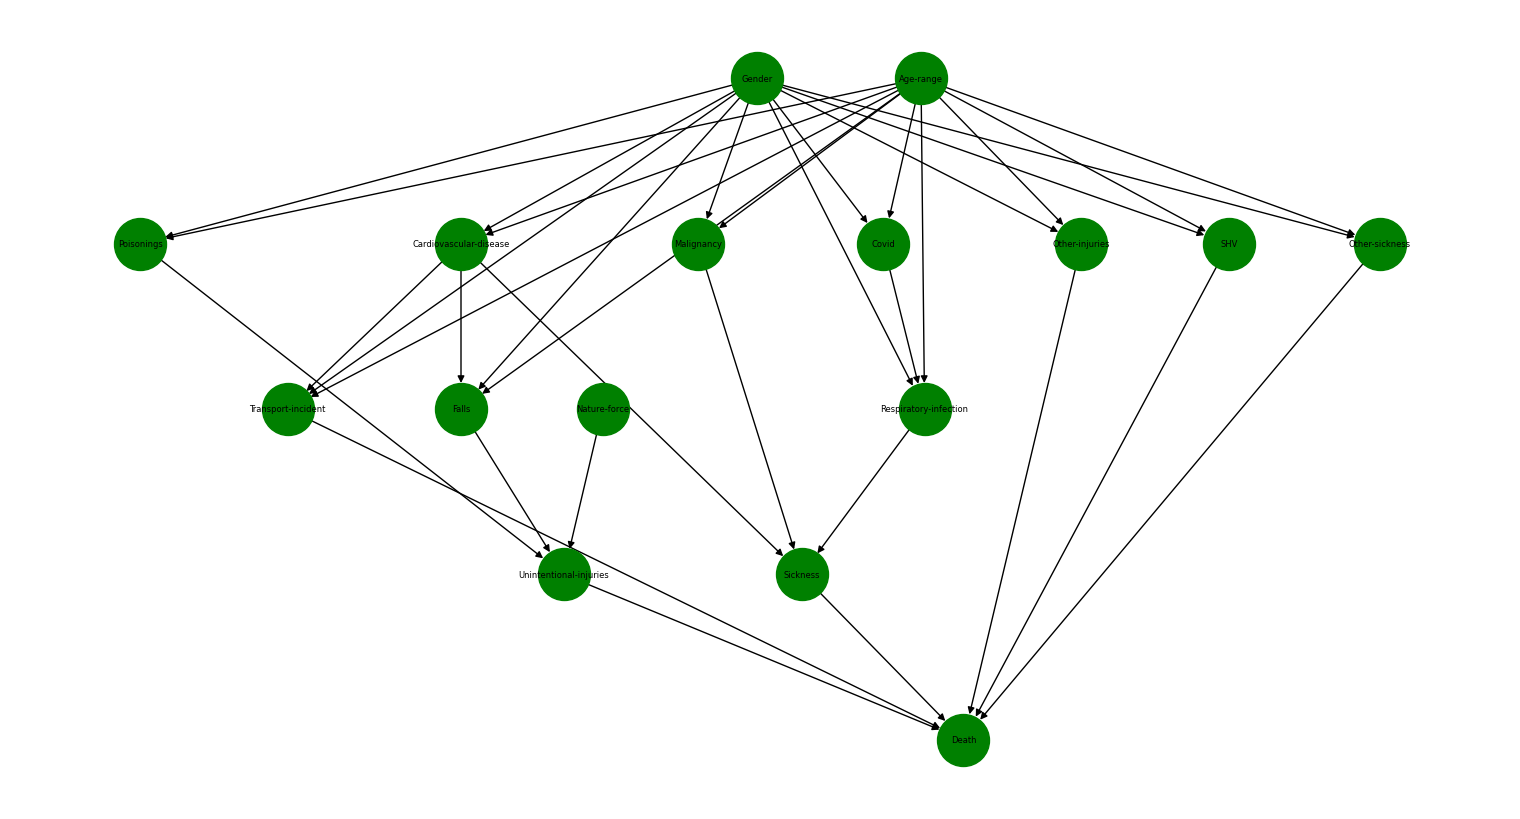

In [4]:
# Manual constructed model with "Covid" node

mc_model_Covid = BayesianNetwork([
    ('Age-range', 'Other-injuries'), ('Age-range', 'Falls'), ('Age-range', 'Poisonings'), ('Age-range', 'Transport-incident'), ('Age-range', 'SHV'),
    ('Age-range', 'Respiratory-infection'), ('Age-range', 'Malignancy'), ('Age-range', 'Other-sickness'), ('Age-range', 'Cardiovascular-disease'),
    ('Age-range', 'Covid'), ('Gender', 'Other-injuries'), ('Gender', 'Falls'), ('Gender', 'Poisonings'), ('Gender', 'Transport-incident'),
    ('Gender', 'SHV'), ('Gender', 'Respiratory-infection'), ('Gender', 'Malignancy'), ('Gender', 'Other-sickness'), ('Gender', 'Cardiovascular-disease'),
    ('Gender', 'Covid'), ('Covid', 'Respiratory-infection'), ('Cardiovascular-disease', 'Falls'), ('Cardiovascular-disease', 'Transport-incident'), 
    ('Cardiovascular-disease', 'Sickness'), ('Other-injuries', 'Death'), ('Unintentional-injuries', 'Death'), ('Falls', 'Unintentional-injuries'),
    ('Poisonings', 'Unintentional-injuries'), ('Nature-force', 'Unintentional-injuries'), ('Transport-incident', 'Death'),
    ('SHV', 'Death'), ('Respiratory-infection', 'Sickness'), ('Malignancy', 'Sickness'), ('Other-sickness', 'Death'), ('Sickness', 'Death')
])

draw_graph(mc_model_Covid,"mc_model_Covid")

## Dataset

The dataset used could be found in "./data/dataset.csv" and it is composed of 1 milion rows. In the dataset there is a distinction between something that can happen (4-) to a person and something that had serious consequences to the person. Each row containing informations about:
1. ID: a unique identifier of the row
2. Age-range:
    - young if age is between 0-14
    - adult if age is between 15-70
    - old if age is 70+ 
    <br></br> <br/>
3. Gender: male or female
4. Respiratory infection: 1 if the person contracted a respiratory infection, 0 otherwise
5. Malignancy: 1 if the person contracted a malignancy, 0 otherwise
6. Cardio-vascular disease: 1 if the person has been affected by a cardio-vascular diseases, 0 otherwise
7. Poisonings: 1 if the person has been poisoned during the year, 0 otherwise
8. SHV (Self-harm violence): 1 if the person has been victim of self-harm violence, 0 otherwise
9. Falls: 1 if person has fallen during the year, 0 otherwise
10. Nature Force: 1 if the person has been victim of natural disasters, 0 otherwise
11. Transport incident: 1 if the person has been victim of a transport incident, 0 otherwise

12. Other injuries: 1 if the person has been victim of others, not tracked, injuries that had serious consequences on the person's health, 0 otherwise
13. Other sickess: 1 if the person suffered from others, not tracked, sickensses that had serious consequences on the person's health, 0 otherwise
14. Sickness: 1 if something among respiratory-infection, malignancy or cardiovascular-disease have badly affected the person's healt, 0 otherwise 
15. Unintentional injuries: 1 if something among falls, poisoning or nature-force have badly affected the person's healt, 0 otherwise
16. Death: 1 if the person died, 0 otherwise

The dataset is generated by a python script ("./data/datasetConstructor.py"). In order to generate the dataset, you need to specify the amout of rows you would like to generate. There it is parameter called "order" that indicate the order of magnitude in scale 10 that represent the numbers of rows you want to create. The generation of each row depends on several arrays of probabilities, each for a different information about the randomly generated person. The probabilities are not casual and they are the result of several researches focused on this scope (all the links to theese researches can be found in the introduction).

In [5]:
# The commented version of the import is needed if you want to change some global data inside datasetConstructor.py
# Dataset automatic construction and retrieving
from imp import reload
import data.datasetConstructor
reload(data.datasetConstructor)
# data.datasetConstructor.datasetConstructor()

# from data.datasetConstructor import datasetConstructor
# Please remove following comment if you want to generate a dataset with current informations
# datasetConstructor()

dataset = pd.read_csv("./data/dataset.csv")
dataset.info(verbose=False)
dataset.head()



/tmp/ipykernel_9758/1219387653.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 16 entries, ID to Death
dtypes: bool(13), int64(1), object(2)
memory usage: 35.3+ MB


,ID,Age-range,Gender,Falls,Poisonings,Nature-force,Cardiovascular-disease,Malignancy,Respiratory-infection,Transport-incident,Sickness,Other-injuries,Unintentional-injuries,Other-sickness,SHV,Death
0,1,young,female,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,young,female,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,young,female,False,False,False,False,False,True,False,False,False,False,False,False,False
3,4,young,female,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,young,female,False,False,False,False,False,False,False,False,False,False,False,False,False


### Overview of the dataset
In the table above we can see the first rows of the generated dataset. Many of the lines are filled with zeros, but this is due to the fact that we are working with real percentages based on the entire Earth population in 2017, so it is not surprising that some people are not associated with any of the reported events. </br>

While the following heatmaps show a projection obtained first grouping by Age-range, then by Gender and summing all the matches in order to obtain the total cases for each of the combinations.


In [6]:
# Creation of a compressed dataset grouping data for age-range and Gender and then summing out all the positive cases

compressed_dataset = dataset.drop("ID",axis=1).groupby(["Age-range","Gender"]).sum()
compressed_dataset.head(6)

Falls  Poisonings  Nature-force  Cardiovascular-disease  \
Age-range Gender                                                            
adult     female  19353        2422          4165                   14174   
          male    25458        2836          4244                   21660   
old       female   5120         110           557                    1672   
          male     6850         129           615                    1098   
young     female  22087        1427          2247                     787   
          male    29598        2379          2261                    1177   

                  Malignancy  Respiratory-infection  Transport-incident  \
Age-range Gender                                                          
adult     female       19514                  54917               17524   
          male         23956                  43689               29505   
old       female        6838                  10022                1127   
          male          8270                   8113                1592   
young     female         376                  65687                2451   
          male           412                  53384                3068   

                  Sickness  Other-injuries  Unintentional-injuries  \
Age-range Gender                                                     
adult     female      1442              27                      23   
          male        1655              47                      34   
old       female       251               8                       6   
          male         247              10                      10   
young     female       715             180                      18   
          male         625              25                      31   

                  Other-sickness   SHV  Death  
Age-range Gender                               
adult     female             361  3589   3623  
          male               883  7273   6144  
old       female             567    43    371  
          male               714   651    535  
young     female             363    32    674  
          male               442    66    689

In [7]:
columns = ["Falls","Poisonings","Nature-force","Cardiovascular-disease","Malignancy","Respiratory-infection","Transport-incident","Sickness","Other-injuries","Unintentional-injuries","Other-sickness","SHV","Death"]
index = ["male","female"]

young = np.array(compressed_dataset.drop(["old","adult"]))
adult = np.array(compressed_dataset.drop(["young","old"]))
old = np.array(compressed_dataset.drop(["young","adult"]))

dataYoung = pd.DataFrame(young,index=index, columns=columns)
dataAdult = pd.DataFrame(adult,index=index, columns=columns)
dataOld = pd.DataFrame(old,index=index, columns=columns)


### Heatmaps
The following section is dedicated to the graphical representation of several heatmaps, one for each sub-category of age. Each heatmap contains two rows: one for male and the other one for female.
The heatmaps contains the number of people affected by each monitored event, divided by age and gender.

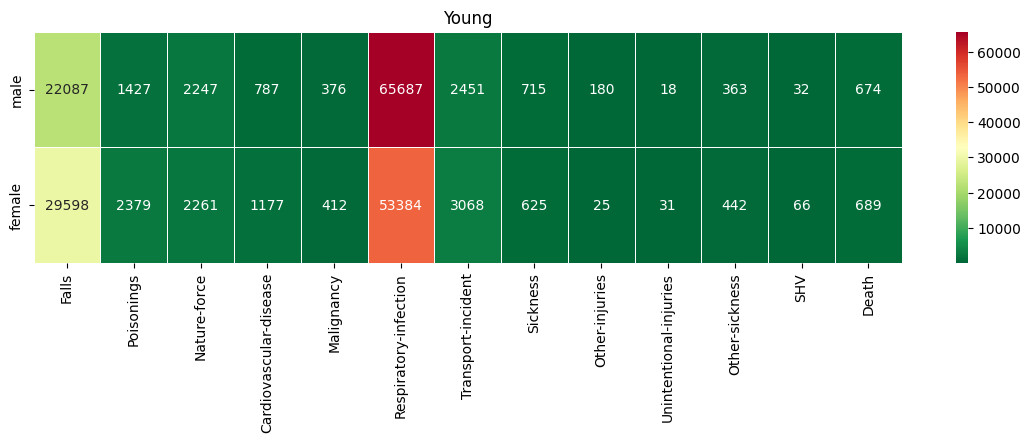

In [8]:
plt.figure(figsize=(14,3))
sns.heatmap(dataYoung, annot=True ,fmt="g", cmap='RdYlGn_r', linewidths=0.5).set_title("Young")
print()

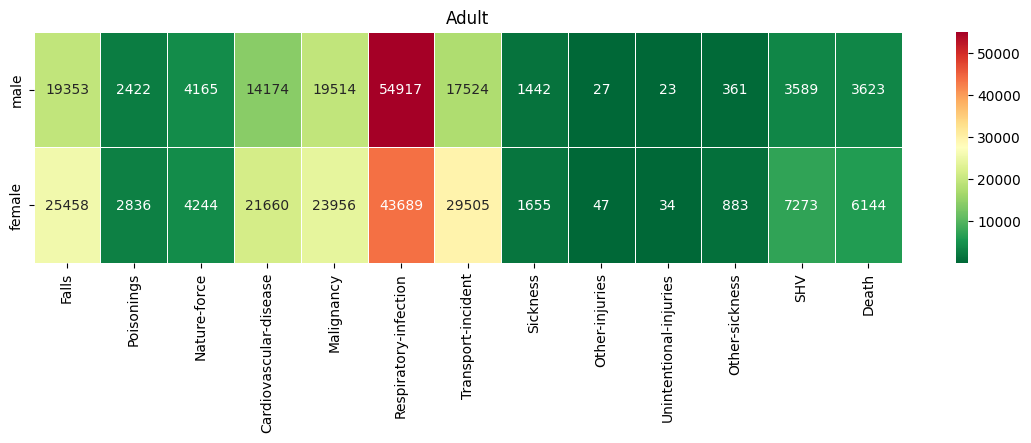

In [9]:
plt.figure(figsize=(14,3))
sns.heatmap(dataAdult, annot=True ,fmt="g", cmap='RdYlGn_r', linewidths=0.5).set_title("Adult")
print()

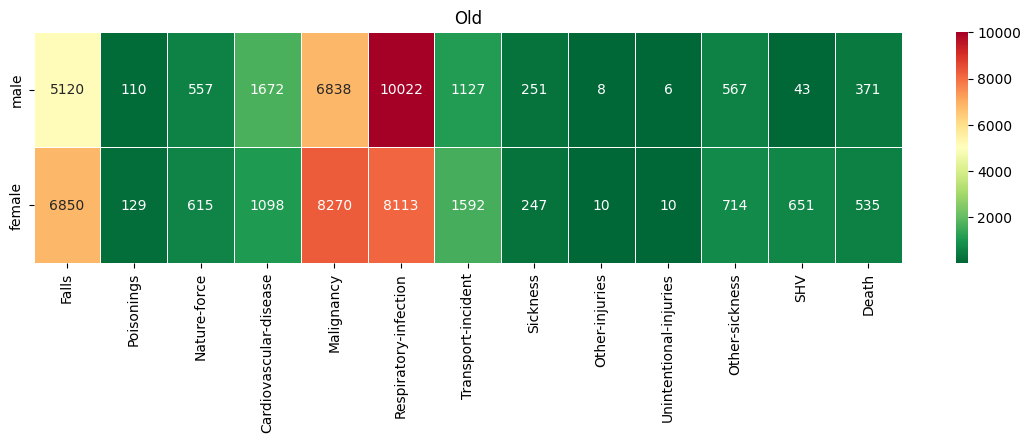

In [10]:
plt.figure(figsize=(14,3))
sns.heatmap(dataOld, annot=True ,fmt="g", cmap='RdYlGn_r', linewidths=0.5).set_title("Old")
print()

#### Heatmap - Conclusions
As can be seen from the heatmaps above, the main events affecting people in all the ages considered is "Respiratory infection". In fact, this effect is the one with the highest probability in the dataset constructor.

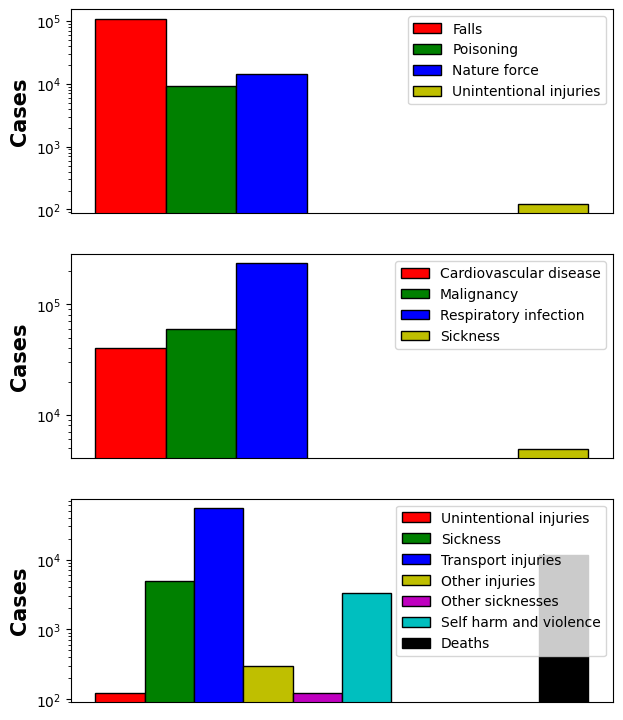

In [11]:
events_heatmap  = dataset.drop(["ID","Age-range","Gender"],axis=1).sum()

events = np.array(events_heatmap.axes)[0]
values = np.array(events_heatmap)

bar_width = 0.05
large_bar = 0.2
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize =(7, 9))

############################################################# #1

falls = [values[0]]
poisonings = [values[1]]
nature = [values[2]]
unintentional = [values[9]]

br1 = np.arange(len(falls))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]
br4 = [x + large_bar for x in br3]

ax1.bar(br1, falls, color ='r', width = bar_width,
        edgecolor ='black', label ='Falls')
ax1.bar(br2, poisonings, color ='g', width = bar_width,
        edgecolor ='black', label ='Poisoning')
ax1.bar(br3, nature, color ='b', width = bar_width,
        edgecolor ='black', label ='Nature force')
ax1.bar(br4, unintentional, color ='y', width = bar_width,
        edgecolor ='black', label ='Unintentional injuries')

ax1.set_ylabel('Cases', fontweight ='bold', fontsize = 15)
ax1.set_xticks([],labels=[]) 
ax1.set_yscale("log")
ax1.legend()

############################################################# #2

cardiovascular = [values[3]]
malignancy = [values[4]]
respiratory = [values[5]]
sickness = [values[7]]

br1 = np.arange(len(cardiovascular))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]
br4 = [x + large_bar for x in br3]

ax2.bar(br1, cardiovascular, color ='r', width = bar_width,
        edgecolor ='black', label ='Cardiovascular disease')
ax2.bar(br2, malignancy, color ='g', width = bar_width,
        edgecolor ='black', label ='Malignancy')
ax2.bar(br3, respiratory, color ='b', width = bar_width,
        edgecolor ='black', label ='Respiratory infection')
ax2.bar(br4, sickness, color ='y', width = bar_width,
        edgecolor ='black', label ='Sickness')

ax2.set_ylabel('Cases', fontweight ='bold', fontsize = 15)
ax2.set_xticks([],labels=[]) 
ax2.set_yscale("log")
ax2.legend()

############################################################# #3

# unintentional
# sickness 
transport = [values[6]]
oth_inj = [values[8]]
oth_sick = [values[9]]
shv = [values[10]]
death = [values[11]]


br1 = np.arange(len(unintentional))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]
br4 = [x + bar_width for x in br3]
br5 = [x + bar_width for x in br4]
br6 = [x + bar_width for x in br5]
br7 = [x + large_bar for x in br6]

ax3.bar(br1, unintentional, color ='r', width = bar_width,
        edgecolor ='black', label ='Unintentional injuries')
ax3.bar(br2, sickness, color ='g', width = bar_width,
        edgecolor ='black', label ='Sickness')
ax3.bar(br3, transport, color ='b', width = bar_width,
        edgecolor ='black', label ='Transport injuries')
ax3.bar(br4, oth_inj, color ='y', width = bar_width,
        edgecolor ='black', label ='Other injuries')
ax3.bar(br5, oth_sick, color ='m', width = bar_width,
        edgecolor ='black', label ='Other sicknesses')
ax3.bar(br6, shv, color ='c', width = bar_width,
        edgecolor ='black', label ='Self harm and violence')
ax3.bar(br7, death, color ='k', width = bar_width,
        edgecolor ='black', label ='Deaths')

ax3.set_ylabel('Cases', fontweight ='bold', fontsize = 15)
ax3.set_xticks([],labels=[]) 
ax3.set_yscale("log")
ax3.legend(loc="best")
plt.show()



In [12]:
mc_model.cpds = []

dataset = pd.read_csv("./data/dataset.csv", dtype={
    'Falls': str,
    'Poisonings': str,
    'Nature-force': str,
    'Cardiovascular-disease': str,
    'Malignancy': str,
    'Respiratory-infection': str,
    'Transport-incident': str,
    'Sickness': str,
    'Other-injuries': str,
    'Unintentional-injuries': str,
    'Other-sickness': str,
    'SHV': str,
    'Death': str
})
d = dataset.drop("ID",axis=1)

mc_model.fit(data=d,
            estimator=BayesianEstimator,
            prior_type="BDeu",
            equivalent_sample_size=10,
            complete_samples_only=False,
)

print(f"Check model: {mc_model.check_model()=}")

Check model: mc_model.check_model()=True


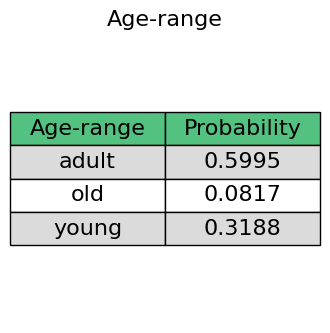

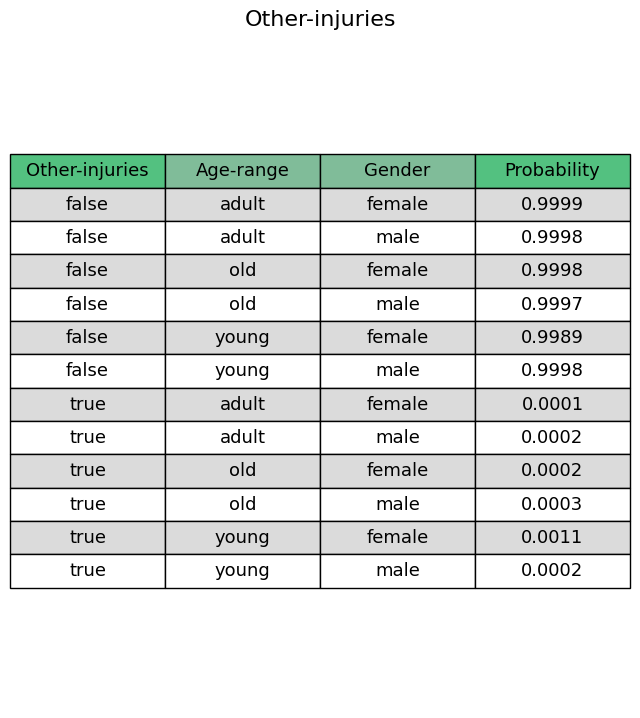

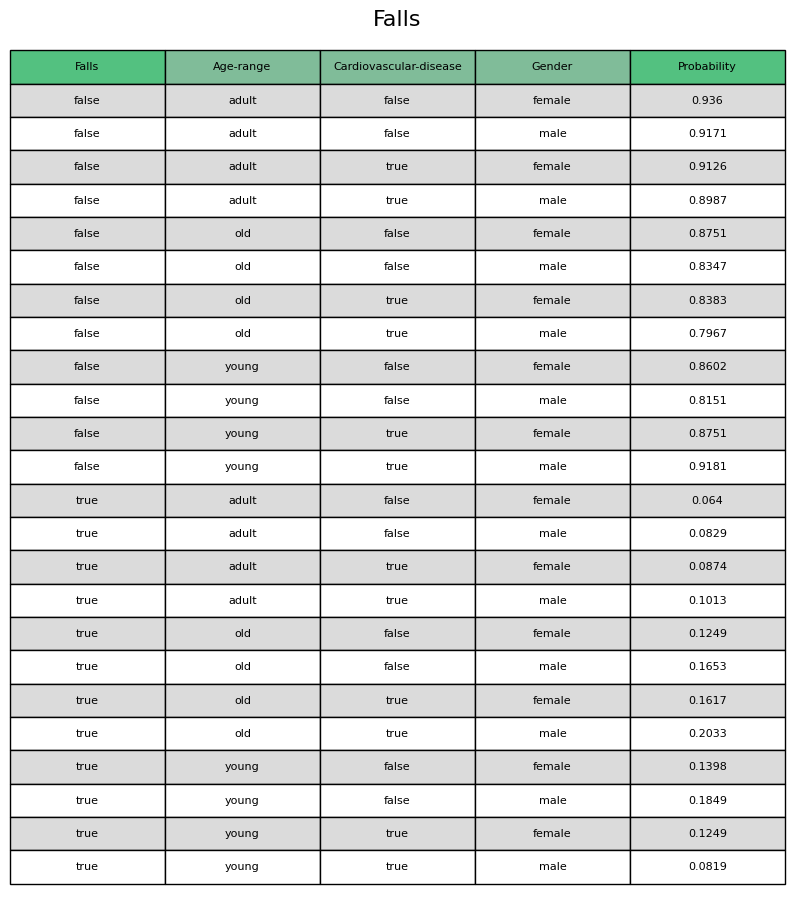

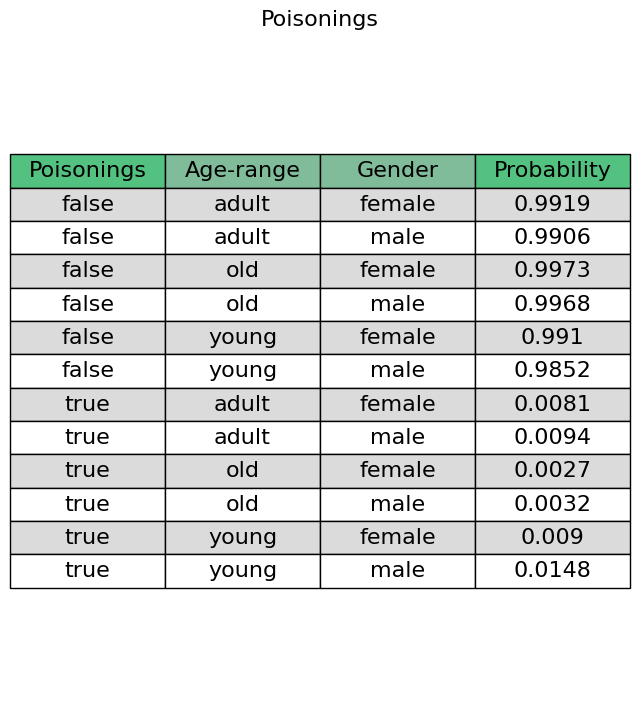

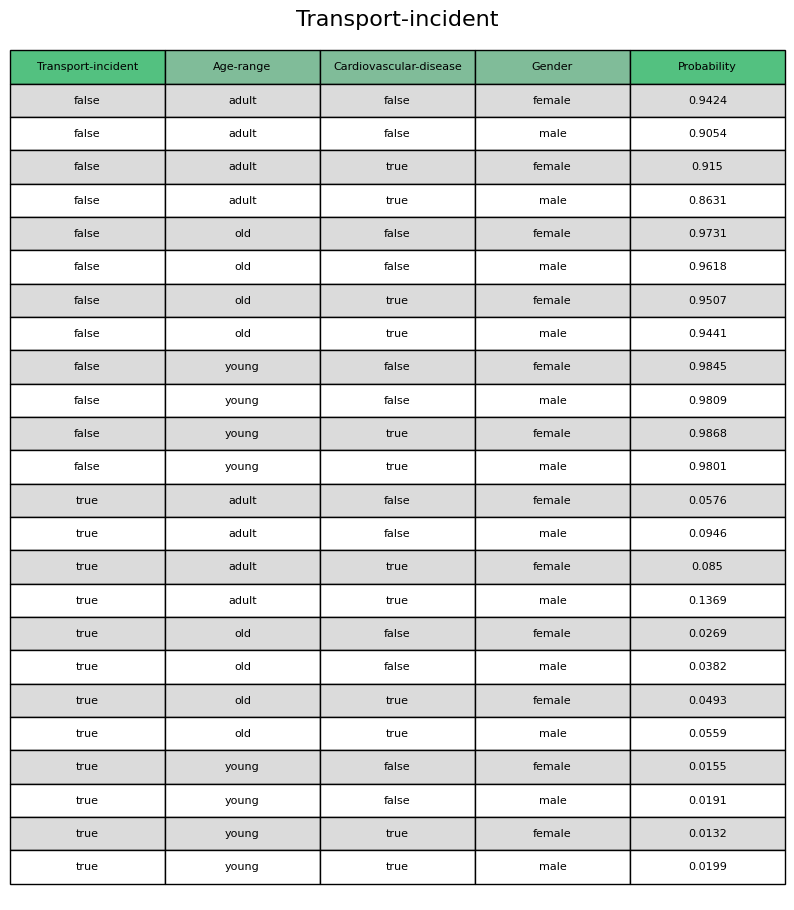

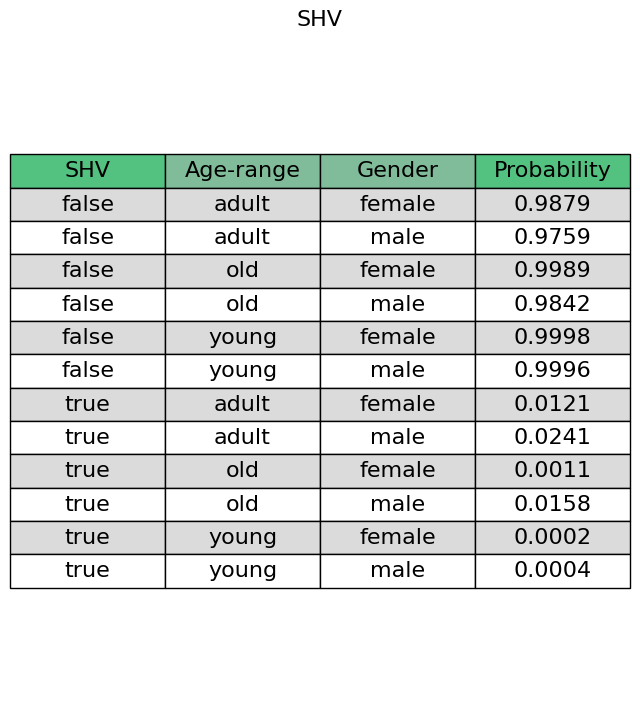

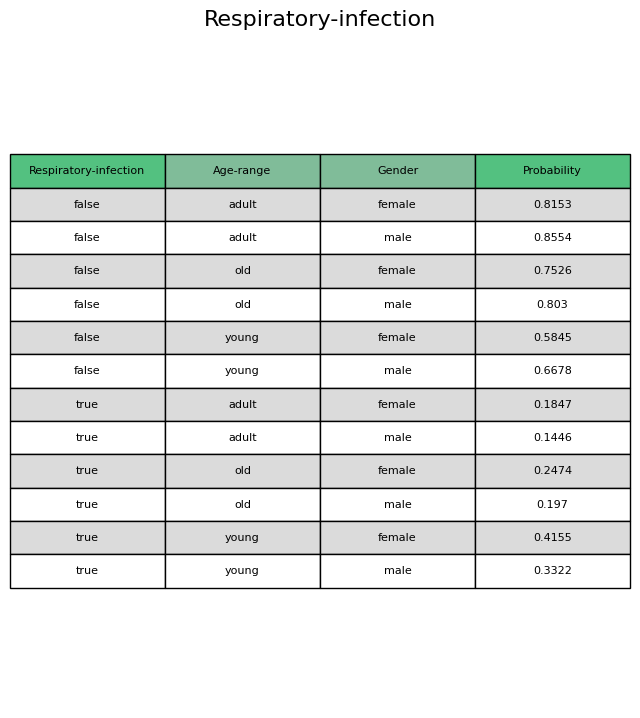

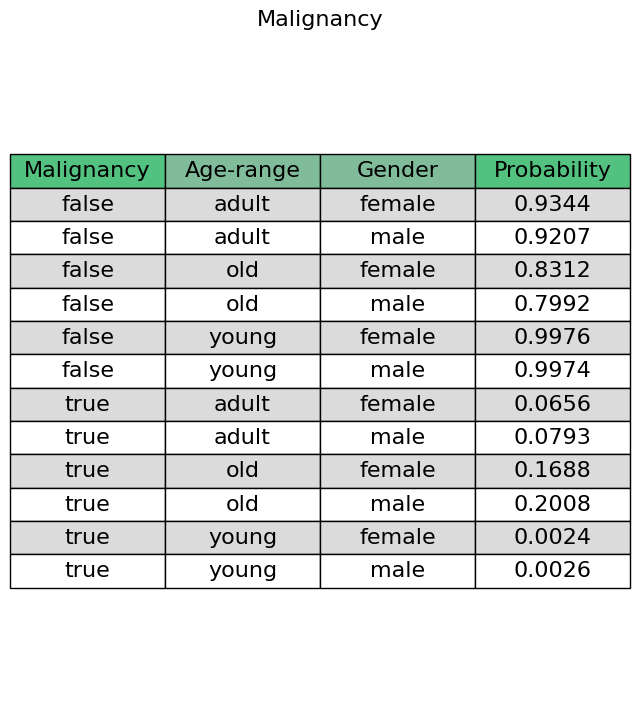

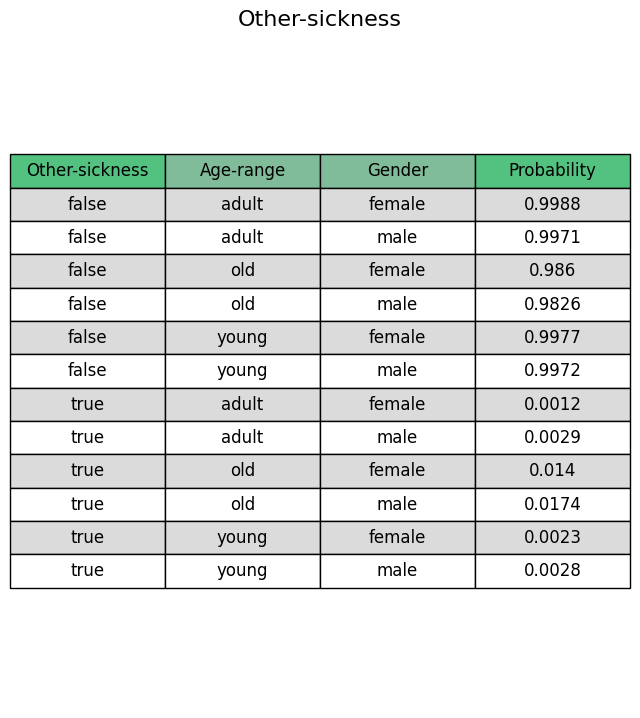

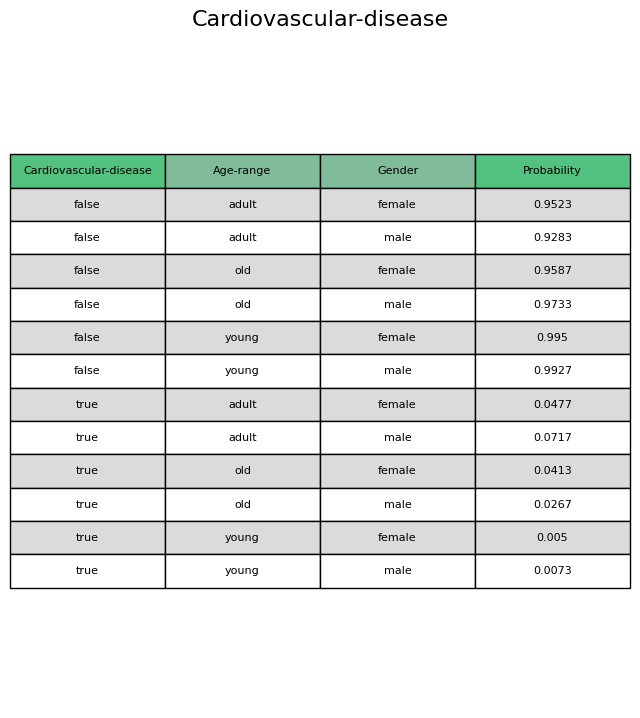

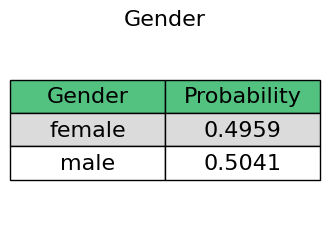

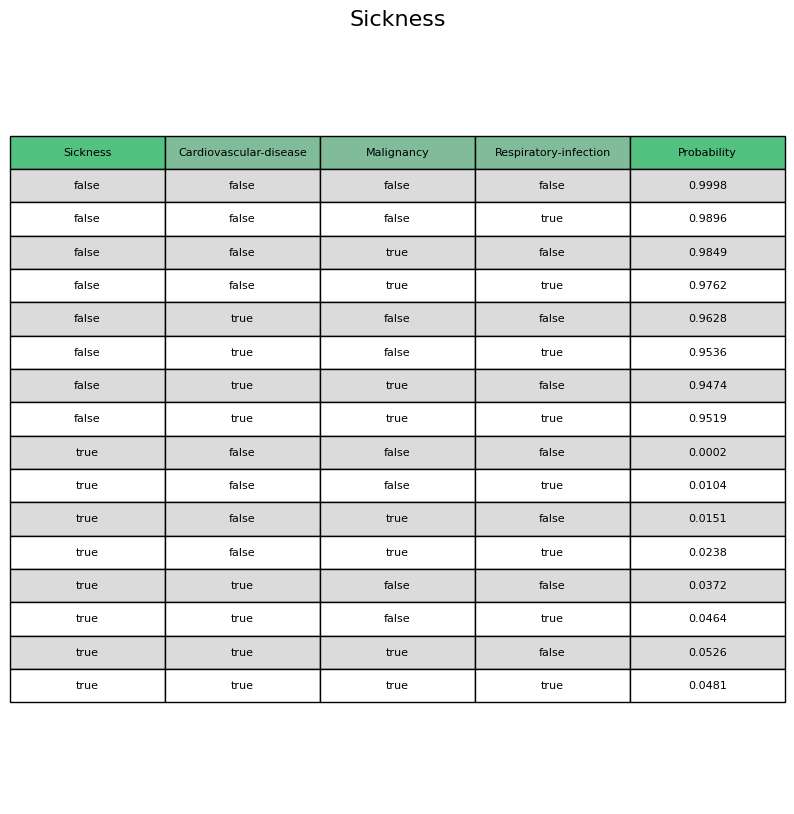

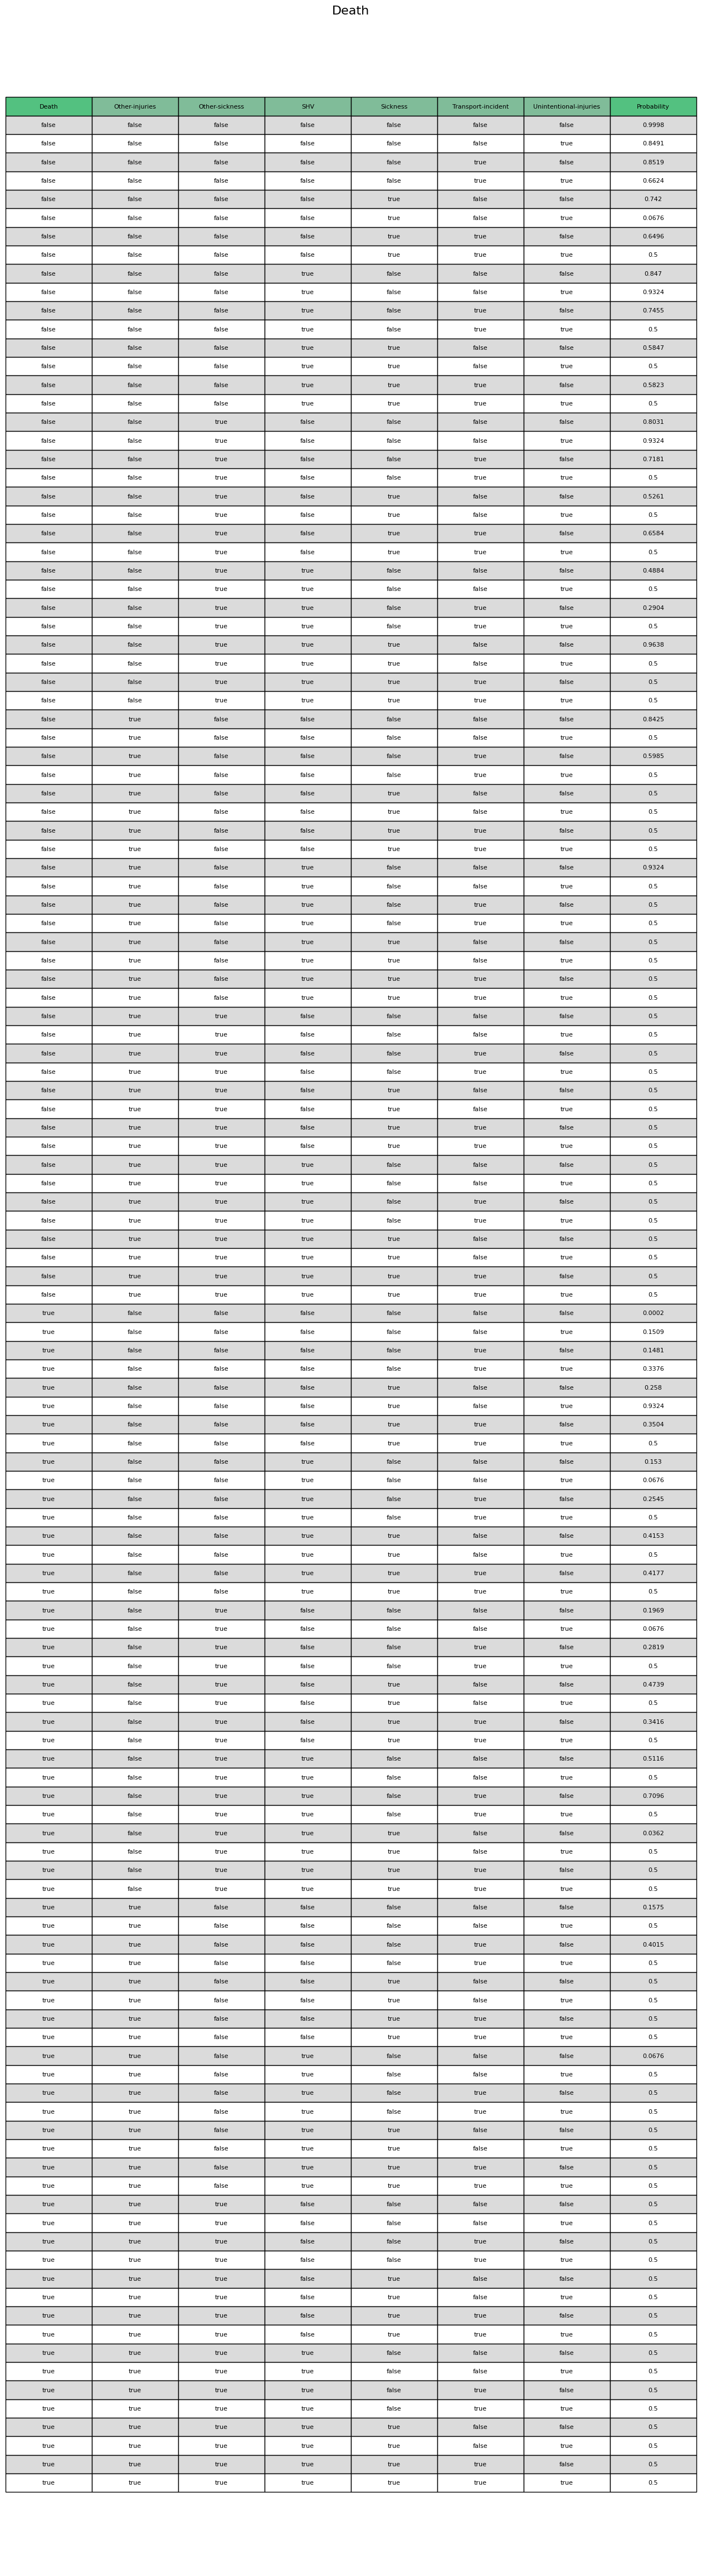

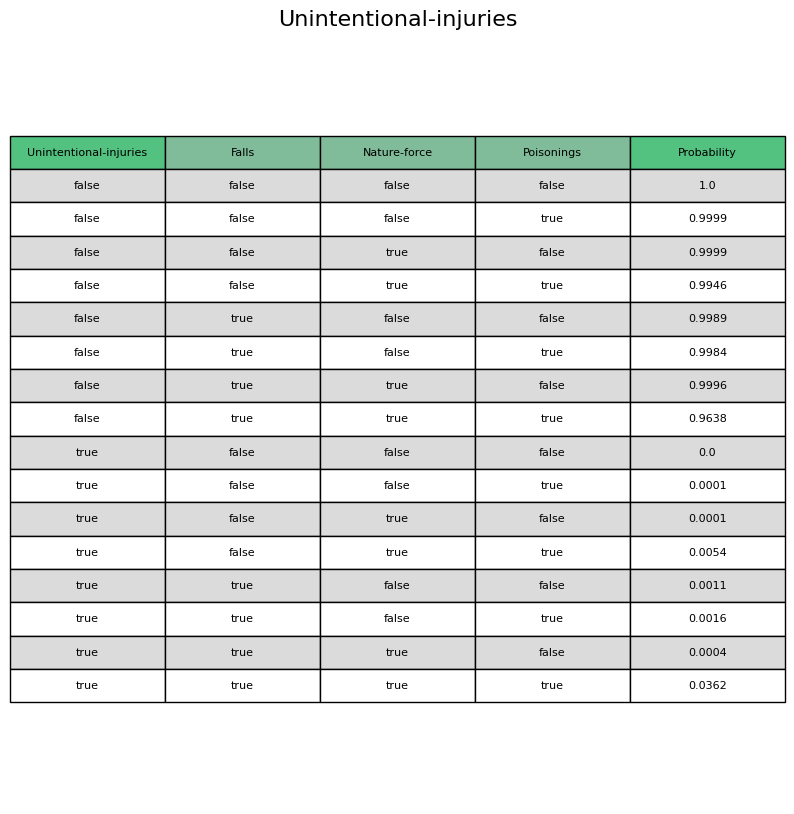

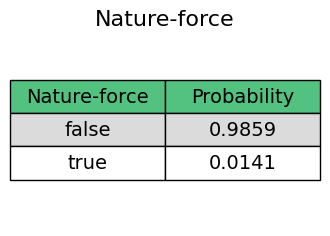

In [13]:
def print_cpd_table(cpd, title=""):
    #Getting a list of lists of states for every variable of cpd
    states_list = []
    for variable in cpd.state_names.keys():
        states_list.append(cpd.state_names[variable])

    rows = []
    i= 0

    #Create combinations of states of every evidence
    states_combos = list(itertools.product(*states_list))
    #Getting a plain array of all probabilities for simplicity
    values = cpd.values.flatten()

    #Creating a row for every possibile combination of states, concatenating the probabilities
    for combo in states_combos:
        row = []
        for elem in combo:
            row += [str(elem)]
        row += [str(round(values[i], 4))]
        rows.append(row)
        i+=1

    #Getting columns names for every variable
    col_labels = []
    for state in cpd.state_names.keys():
        col_labels+= [state]
    col_labels += ["Probability"]

    #Calculating figsize
    calculated_width = len(list(cpd.state_names.keys()))+1
    calculated_length = sum([len(cpd.state_names[var]) for var in cpd.state_names.keys()])*1.25
    if(cpd.variable == "Death"):
        calculated_length += 42
    
    #Getting colors for first row
    col_colours = np.full(calculated_width, "#80bc99")
    col_colours[0] = col_colours[calculated_width-1] = "#53c180"
    
    #Plotting the constructed table
    fig, ax1 = plt.subplots(figsize=(calculated_width, calculated_length))
    table = ax1.table(cellText = rows,
                      cellLoc = "center",
                      colLabels = col_labels,
                      colColours = col_colours,
                      loc = "center")
    
    #Visual Fixing
    for i in range(1, len(rows)+1):
        if i%2:
            for j in range(0, len(cpd.state_names.keys())+1):
                table[(i, j)].set_facecolor("#dbdbdb")

    table.scale(2, 2)
    table.set_fontsize(16)
    ax1.axis("off")
    ax1.set_title(cpd.variable + title, fontsize=16)

for cpd in mc_model.get_cpds():
    print_cpd_table(cpd)
    pass

In [14]:

def getPossibleGroups(evidences):
    values = []
    for evidence in evidences:
        values.append(evidence["values"])
    return list(itertools.product(*values))

# elements: array of tuples where the first element is the node of the query and the other elements are the evidences to use

def completeQueriesGenerator(model,elements):
    all_states = model.states
    all_queries = []
    for element in elements:
        node = element[0]
        queries = []
        evidences = []
        for i in range(1,len(element)):
            evidences.append({"evidence":element[i],"values":all_states[element[i]]})

        groups = getPossibleGroups(evidences)
        for group in groups: 
            evidences_obj = {}
            for evidence_value in zip(evidences, group): 
                curr_key = evidence_value[0]['evidence']
                evidences_obj[curr_key] = evidence_value[1]
            queries.append(([node], evidences_obj))        
        all_queries = all_queries + queries
    return all_queries

In [15]:
allStates = mc_model.states

# Inference
def inference(model, target, evidence):
    model_inference = VariableElimination(model)
    return model_inference.query(target, evidence)


def plot_tables(models, targets, evidences= {}, error = False, err_label = "Error"):
    #Getting tables given targets and evidences
    
    #Getting all models names and columns labels
    model_names = [model.name for model in models]
    col_labels = targets + model_names 
    if error:
        col_labels += [err_label]

    #Constructing header columns colours array
    col_colours = np.full(len(targets) + len(models) + (1 if error else 0), "#80bc99")
    if error:
        col_colours[len(col_colours)-1] = "red"

    #Getting a list of all targets states
    targets_values = {}
    for target in targets:
        targets_values[target] = mc_model.states[target]

    #Calculating all probabilites for targets, given evidences, with every given model
    query_by_model = {}
    for model in models:
        real_evidences = {}
        for key,val in evidences.items():
            if key in model.model.nodes:
                real_evidences[key] = val
        query_by_model[model] = inference(model.model, targets, real_evidences)
    
    #Generating all possible combinations of values
    rows = []
    targets_combinations = list(itertools.product(*targets_values.values()))
    
    #For every combination and every model, generating a row with calculated probability
    for combo in targets_combinations:
        row = [*combo]
        combo_queries = [round(query_by_model[this_model].get_value(**dict(zip(targets_values.keys(), combo))), 4) for this_model in query_by_model.keys()] 
        row += combo_queries
        if error and len(row)>2:
            row += [round(abs(row[1] - row[2]), 4)]
        rows.append(row)
    
    title = f"P({', '.join(targets)} | {', '.join([f'{key}={value}' for (key, value) in evidences.items()])})"

    #Plotting the table of inference
    fig, ax1 = plt.subplots(figsize=(len(targets_combinations) + 5, len(targets)+len(models) +(1 if error else 0) +5 ))
    table = ax1.table(cellText = rows,
                      cellLoc = "center",
                      colLabels = col_labels,
                      colColours = col_colours,
                      loc = "center")
    
    #Visual Fixing
    for i in range(1, len(rows)+1):
        if not i%2:
            for j in range(0, len(targets) + len(models) + (1 if error else 0)):
                table[(i, j)].set_facecolor("#dbdbdb")

    table.scale(2, 2)
    table.set_fontsize(12)
    ax1.axis("off")
    ax1.set_title(title)



In [16]:
def print_queries(model, queries):
    handWrittenQueries = [
        # (["X"], {"evidence": "value"}),   
    ]
    queries = queries + handWrittenQueries
    for query in queries:
        plot_tables(model, *query)

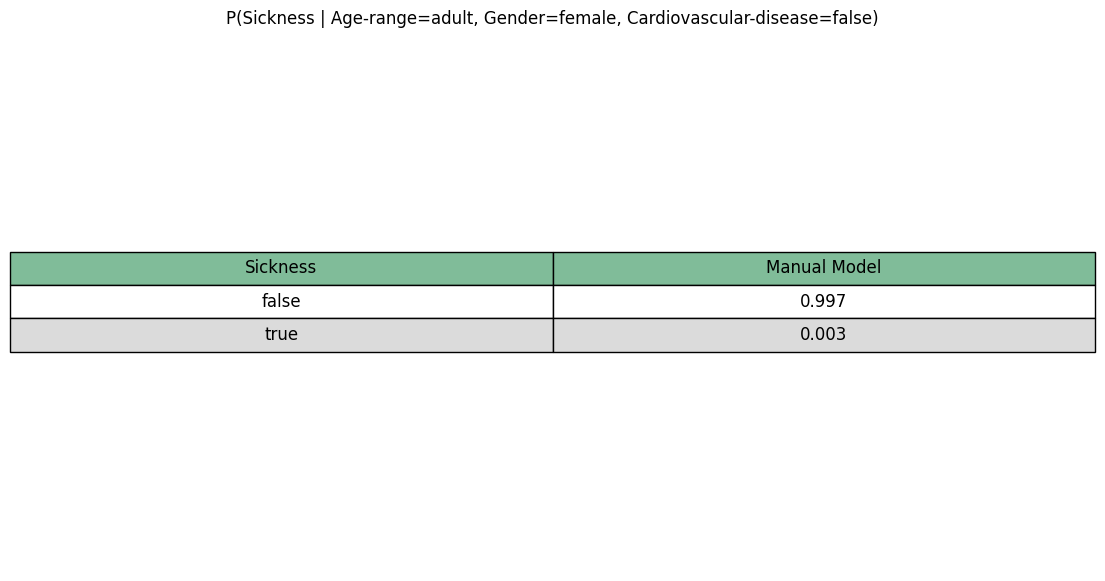

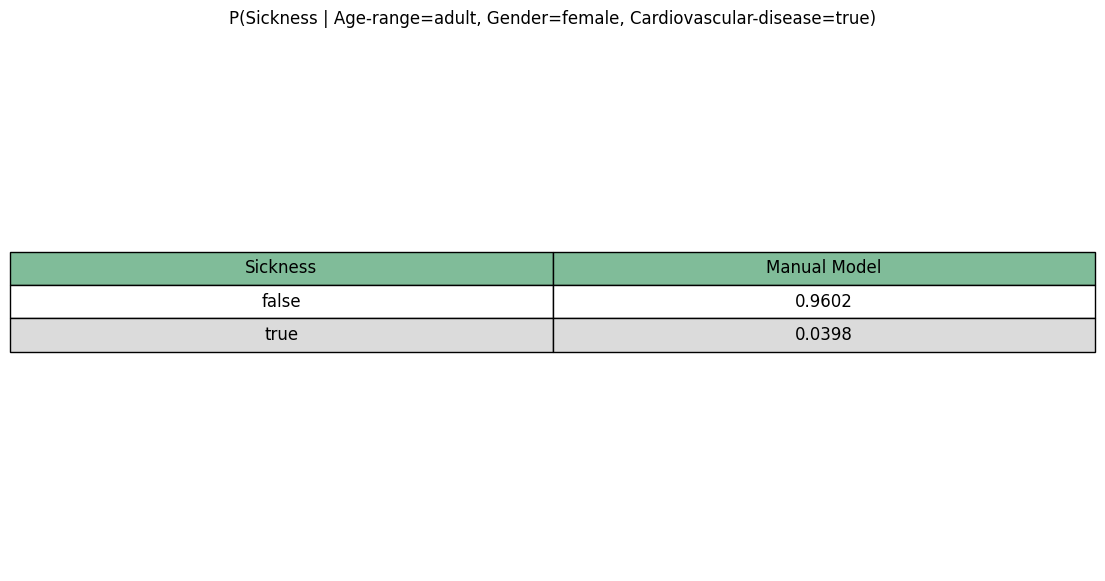

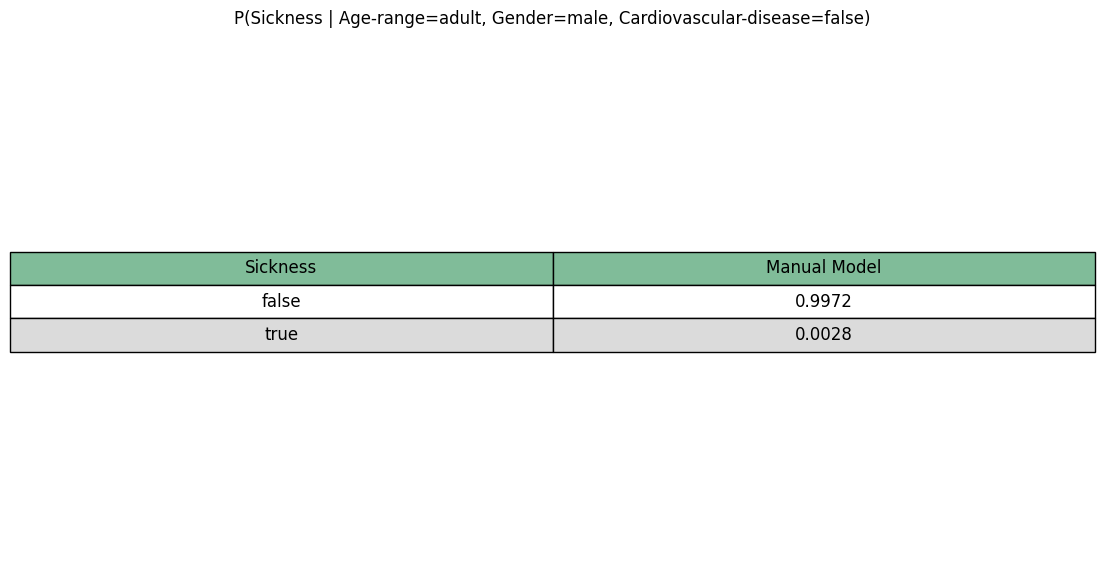

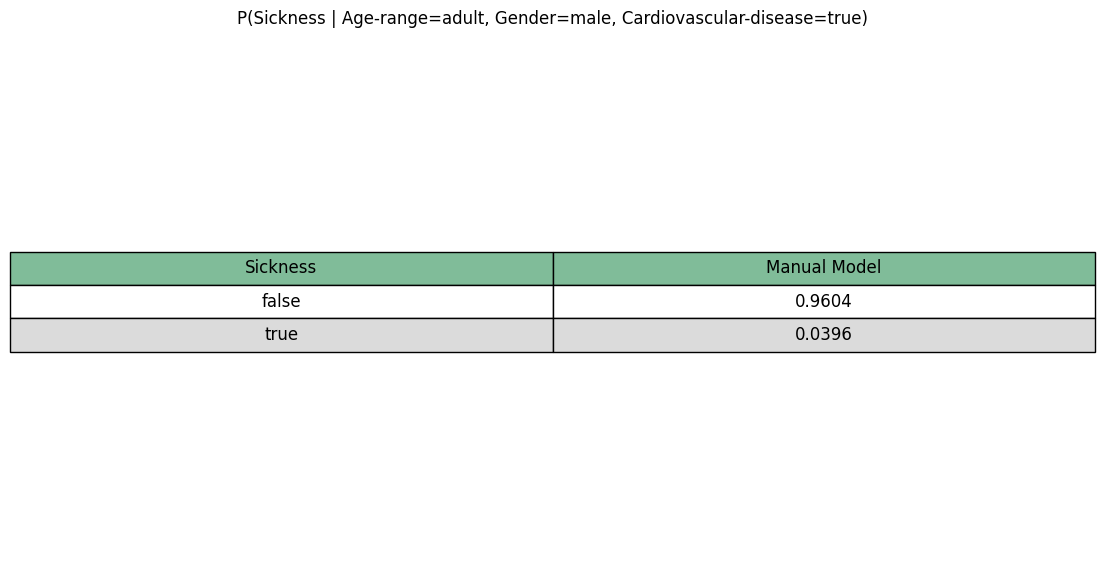

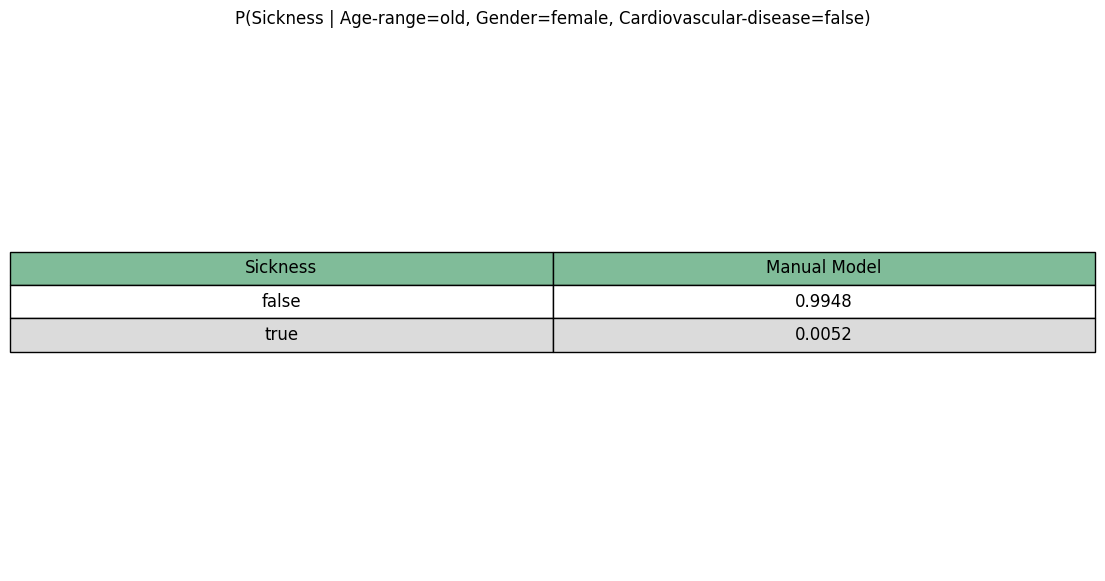

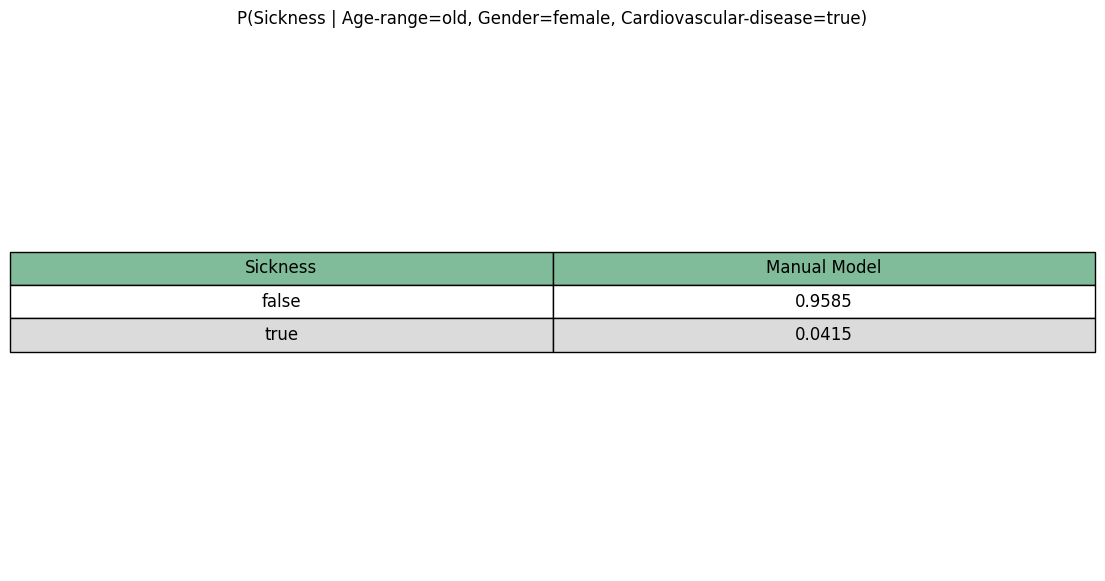

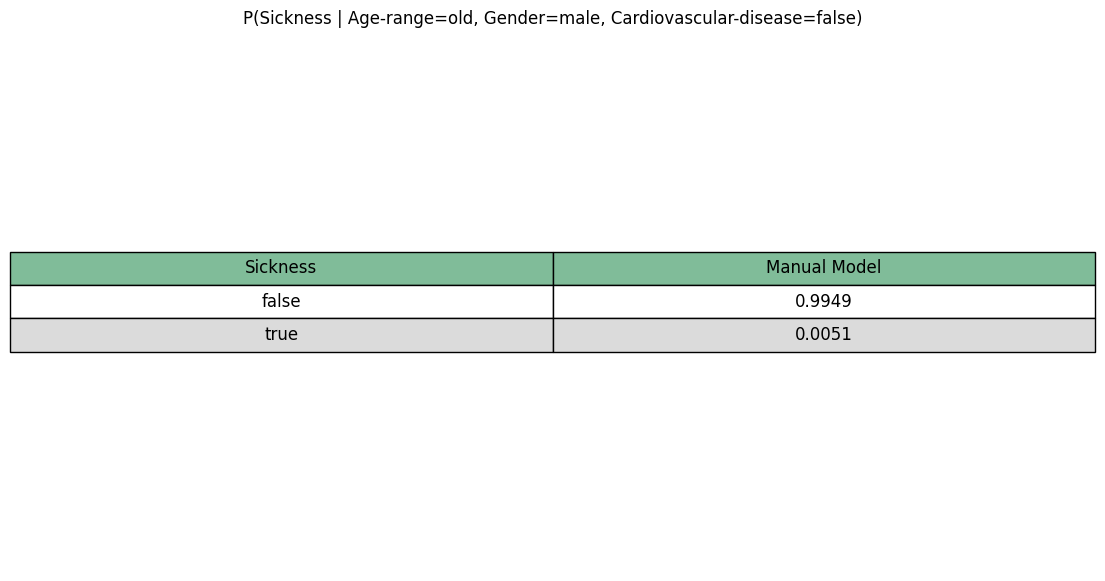

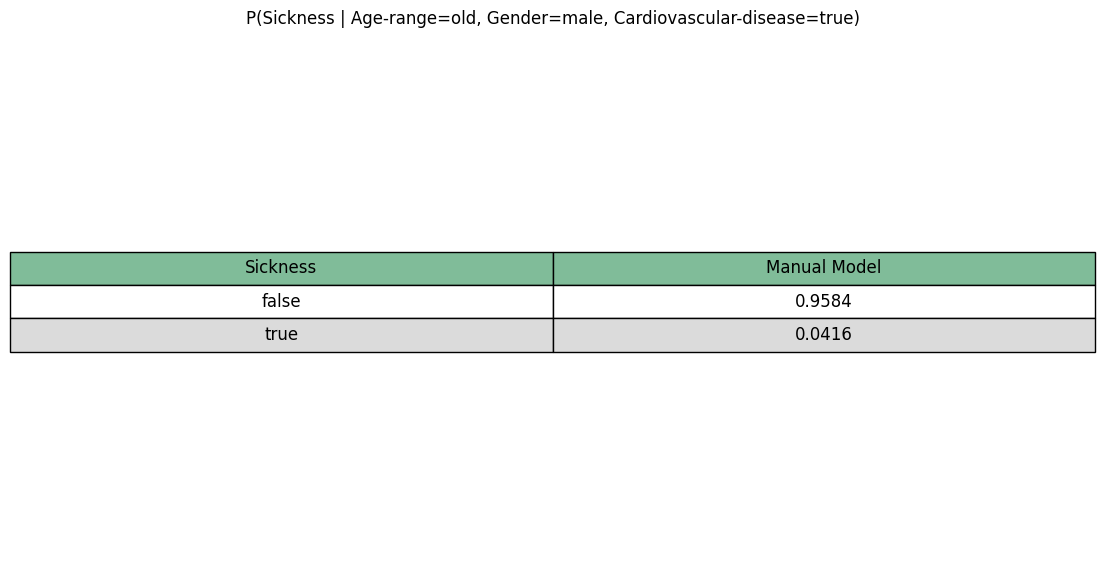

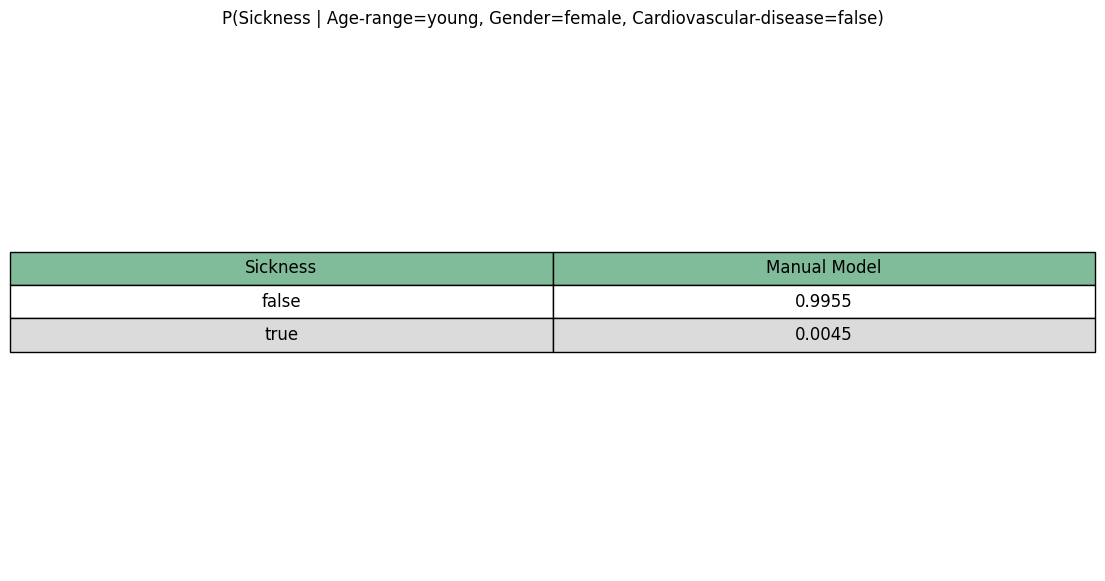

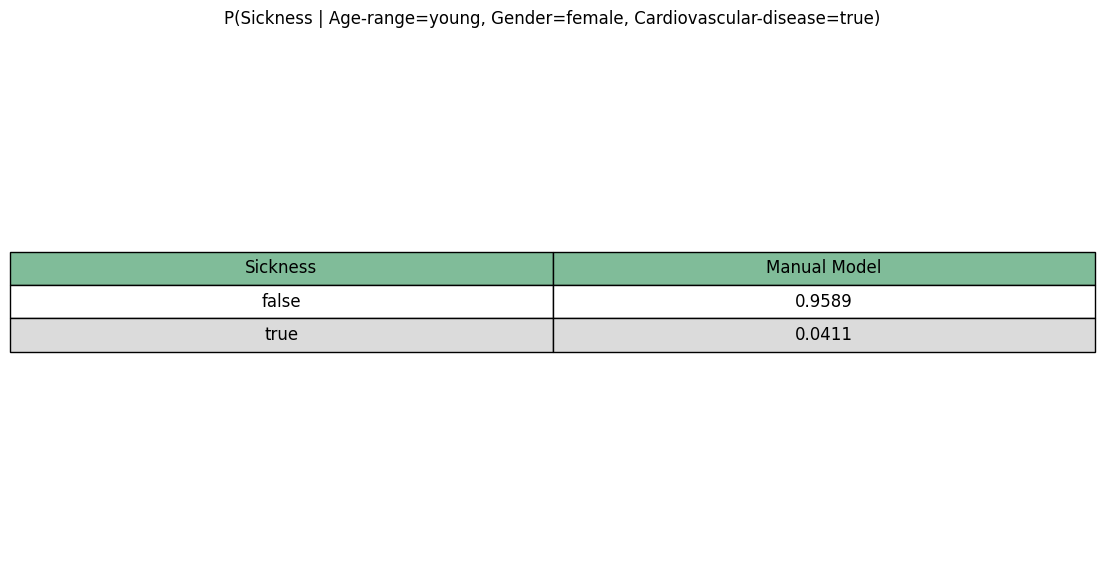

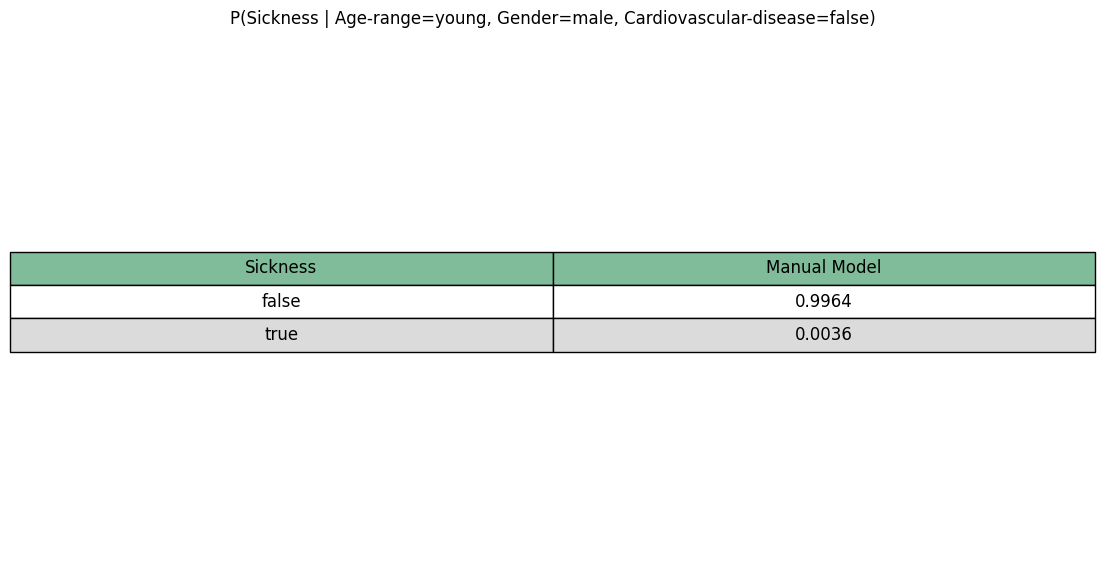

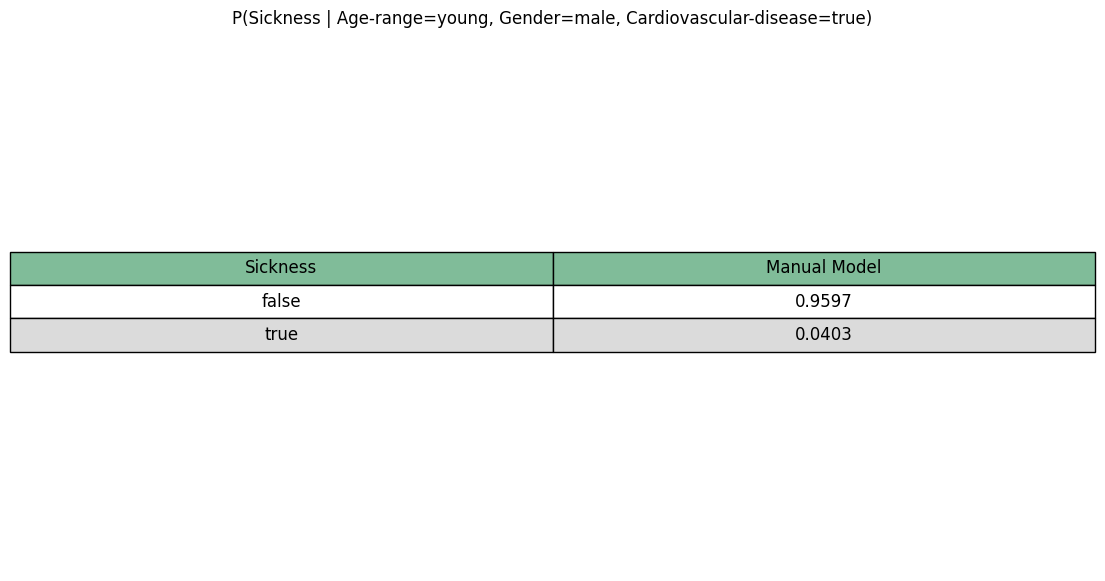

In [17]:
class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        
models = [
    Model(model=mc_model, name="Manual Model"),
]

q = completeQueriesGenerator(mc_model,(("Sickness","Age-range","Gender","Cardiovascular-disease"),))
print_queries(models, q)

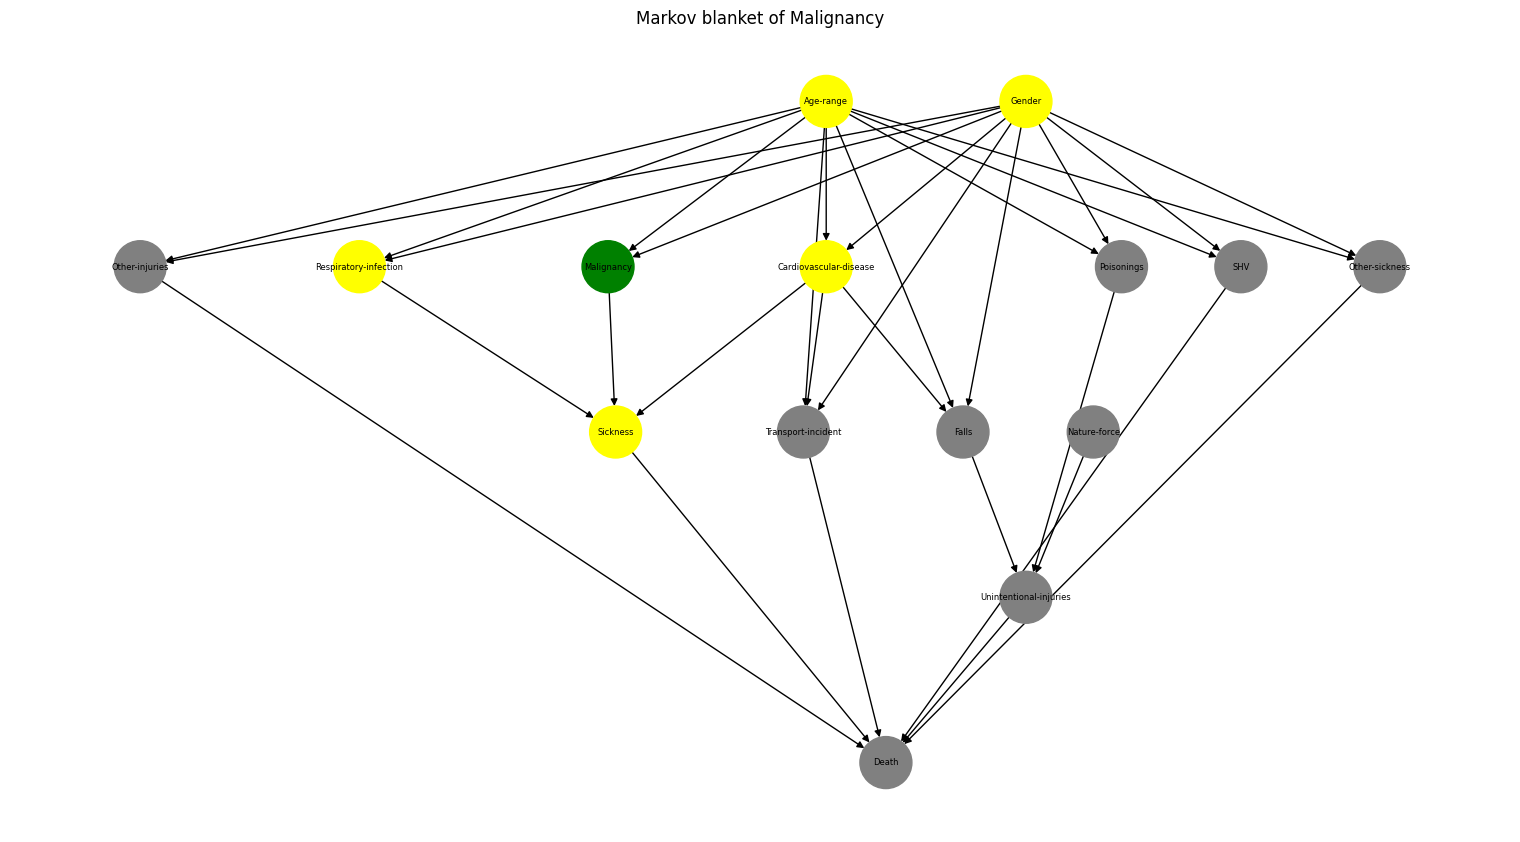

In [18]:
def markov_blanket_graph(node, model):
    blanket = model.get_markov_blanket(node)
    color = ["green" if n == node else "yellow" if n in blanket else "grey" for n in model.nodes]
    title = f'Markov blanket of {node}'
    draw_graph(model, title, color, title)

markov_blanket_graph("Malignancy", mc_model)

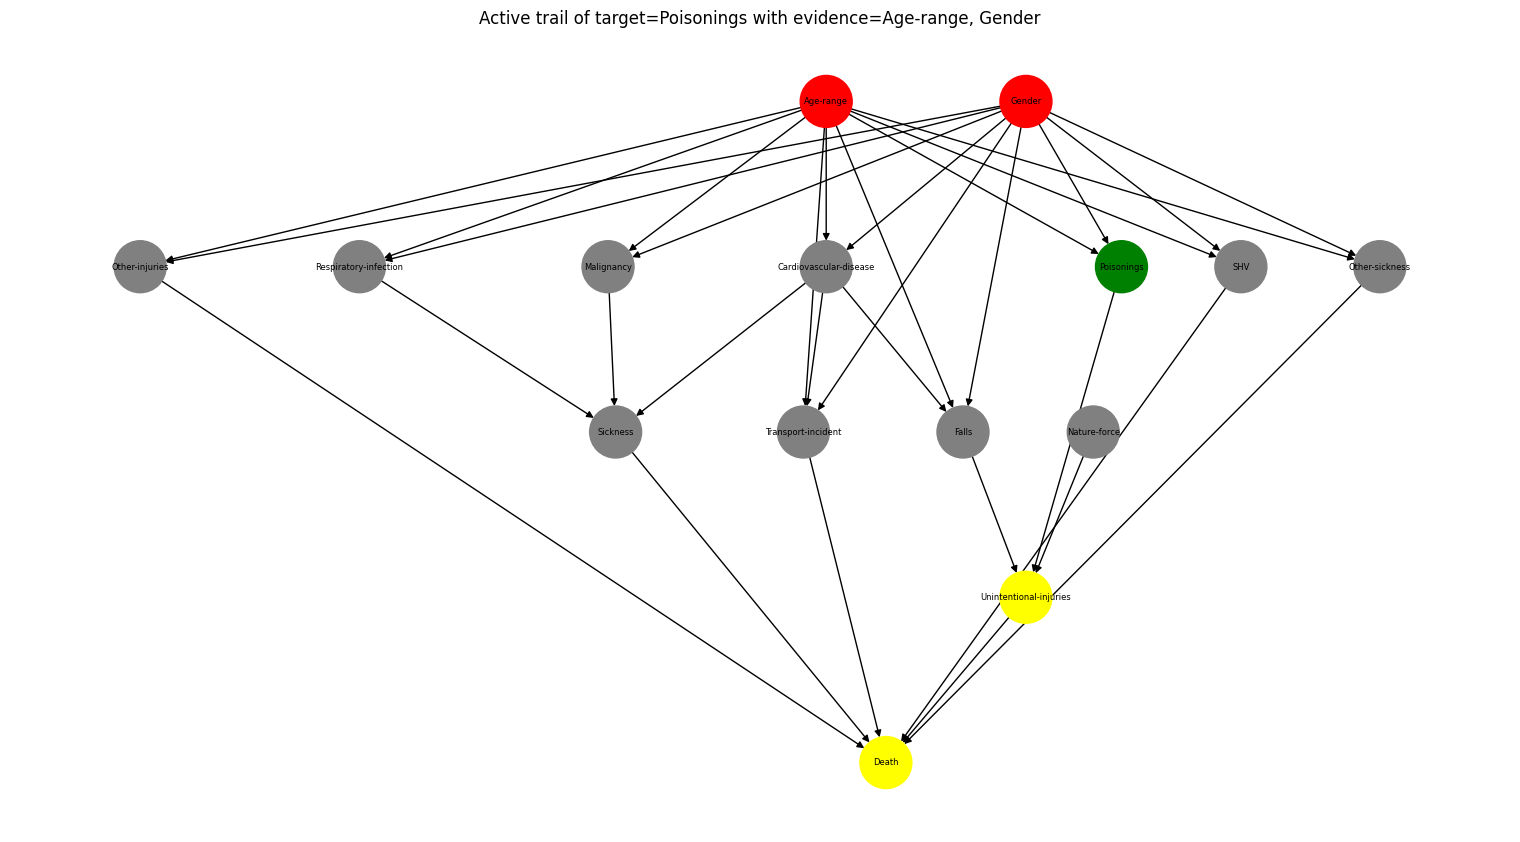

In [19]:
def active_trail_graph(target, evidences, model):
    trail_nodes = model.active_trail_nodes(target, observed=evidences).get(target)
    trail_nodes.remove(target)
    color = ["green" if n == target else "yellow" if n in trail_nodes else "red" if n in evidences else "grey" for n in model.nodes]
    title=f"Active trail of target={target} {'with evidence='+', '.join(evidences) if len(evidences) != 0 else 'with no evidence'}"
    draw_graph(model, title, color, title)

active_trail_graph("Poisonings", ["Age-range", "Gender"], mc_model)

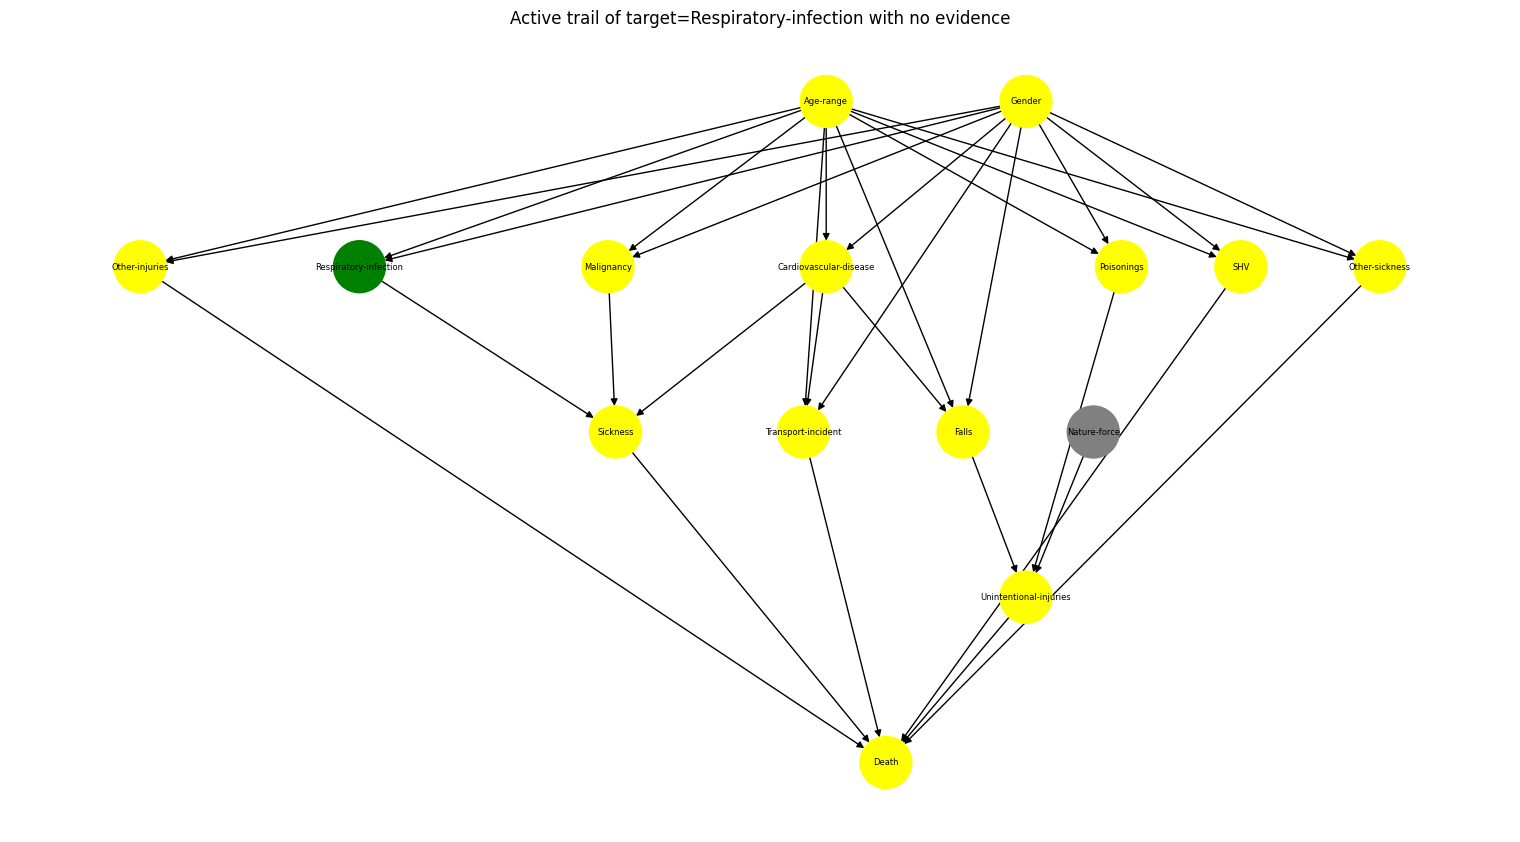

In [20]:
def dependency_graph(node, model):
    active_trail_graph(node, [], model)

dependency_graph("Respiratory-infection", mc_model)

# Model comparison
Let's compare our models in terms of structure and results. In particular we will compare:
1. Manual constructed model from dataset (we will refer to this model as <i>Dataset-model</i>)
2. Manual constructed model from BIF<sub>Bayesian Interchange Format</sub> (we will refer to this model as <i>Standard-model</i>)
3. Manual constructed model considering Covid from BIF (we will refer to this model as <i>Covid-model</i>)

In [21]:
dataset_model = mc_model
standard_model = BIFReader("./data/probabilities.bif").get_model()
covid_model = BIFReader("./data/probabilities_plus_Covid.bif").get_model()

models = [
    Model(model=dataset_model, name="Dataset-Model"),
    Model(model=standard_model, name="Standard-Model"),
    Model(model=covid_model, name="Covid-Model")
]
models_st_ds = models[:2]
models_covid = models[1:]

In [22]:
def get_num_parameters(model): return sum(
    [len(cpd.get_values().ravel()) for cpd in model.get_cpds()])

print("Number of parameters in Standard model from BIF: " + str(get_num_parameters(standard_model)))
print("Number of parameters in dataset-constructed model: " + str(get_num_parameters(dataset_model)))
print("Number of parameters in Standard model plus covid from BIF: " + str(get_num_parameters(covid_model)))

Number of parameters in Standard model from BIF: 299
Number of parameters in dataset-constructed model: 299
Number of parameters in Standard model plus covid from BIF: 323


As can be seen from the analysis above, the Dataset-model contains as many parameters as the Standard-model extracted from the BIF file.\
Furthermode, we can notice that the Covid-model containing also the <i>Covid</i> node has an higher number of entries because we need also to model the probabiliy related to contracting Covid-19 and its effects on respiratory diseases.\
Here are some interesting comparisons between theese models:

### Comparison \#1
In this first part of comparison we will compare the Standard-model and the Covid-model. Both are derived from a BIF file. We are making this comparison in order to see if the presence of Covid has some real influence in the probabilities. Let's have some tests.


We are now computing the probability of Sickness given the following evidences:
- Age Range = old
- Gender = female
- Covid = true (this only affect the Covid-model in which we are considering the new node Covid)

As can be seen from the table below the probability increase by one order of magnitude in the Covid-model where the evidence <i>Covid=true</i> has a real effect

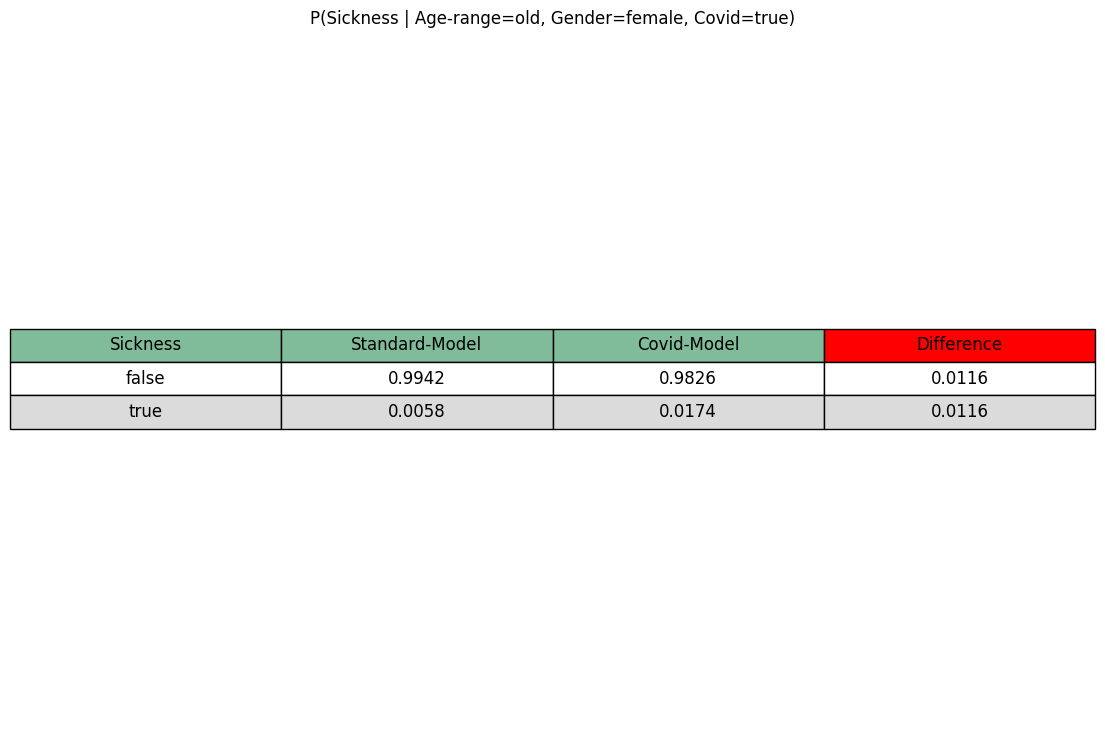

In [23]:

plot_tables(models_covid, ["Sickness"], {"Age-range":"old", "Gender":"female", "Covid":"true"}, error=True, err_label="Difference")

Comparing Covid-model which <b>includes</b> <i>Covid</i> variable with the Standard-model <b>without</b> it, the <i>Respiratory Infection</i> probability to be True more than doubles if subject suffers from Covid, highlighting the strong weight of the virus on possibles respiratory damages.<br>
So, the absence of the variable has a serious impact on <i>Respiratory-infection</i> probability if subject suffers from Covid, while it is completely ininfluent if <i>Covid</i>= False.

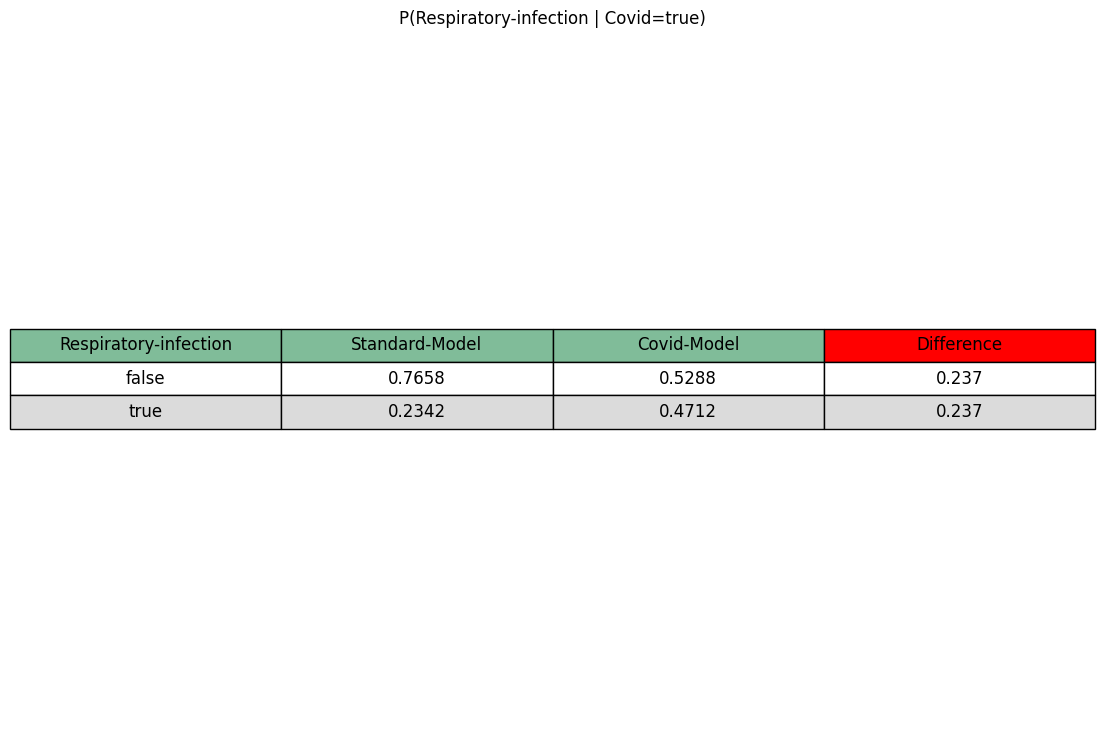

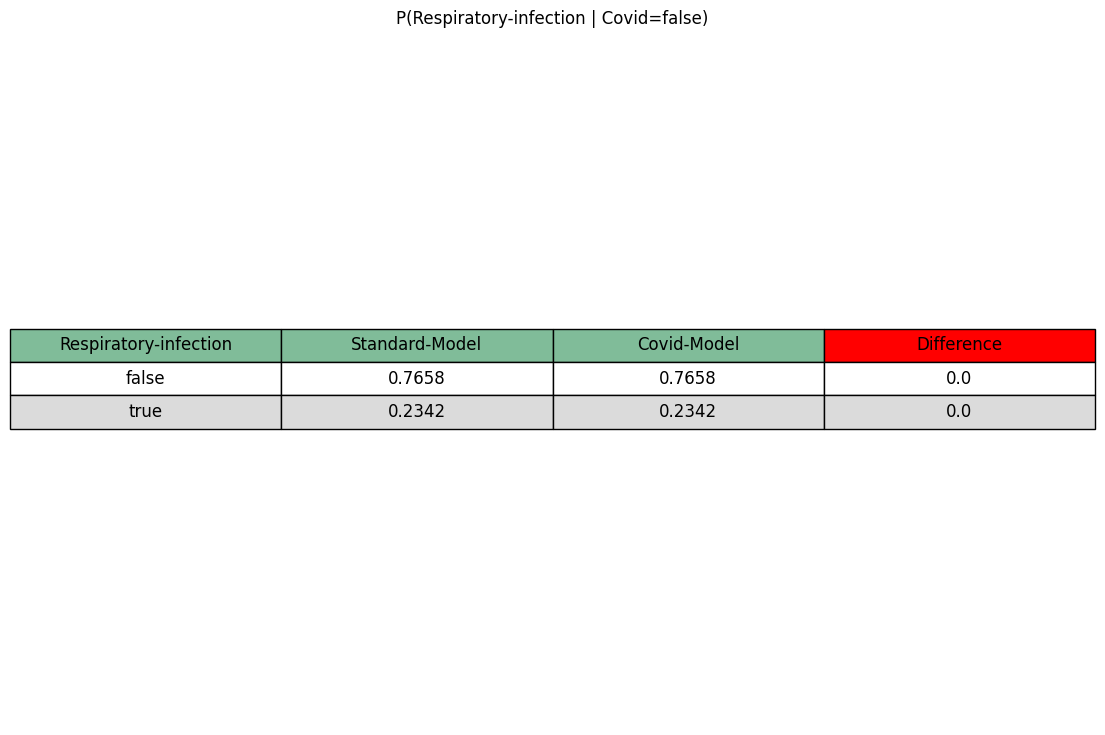

In [24]:
plot_tables(models_covid, ["Respiratory-infection"], {"Covid":"true"}, error=True, err_label="Difference")
plot_tables(models_covid, ["Respiratory-infection"], {"Covid":"false"}, error=True, err_label="Difference")

As we can see in the following table, the probability of getting sick increases significantly if <i>Covid</i>= True in the Covid-model.
Anyway, sickness probability changes <b>also</b> when <i>Covid</i>= False, comparing the two analyzed models, which couldn't make sense at first sight: the reason is the absence of a (Covid, Sickness) edge which would have changed probability of Sickness in the two possible cases. Instead, in the Covid-model, the <i>Sickness</i> CPD table contains higher probabilities of getting sick just because Covid <i>exists in that world</i>.

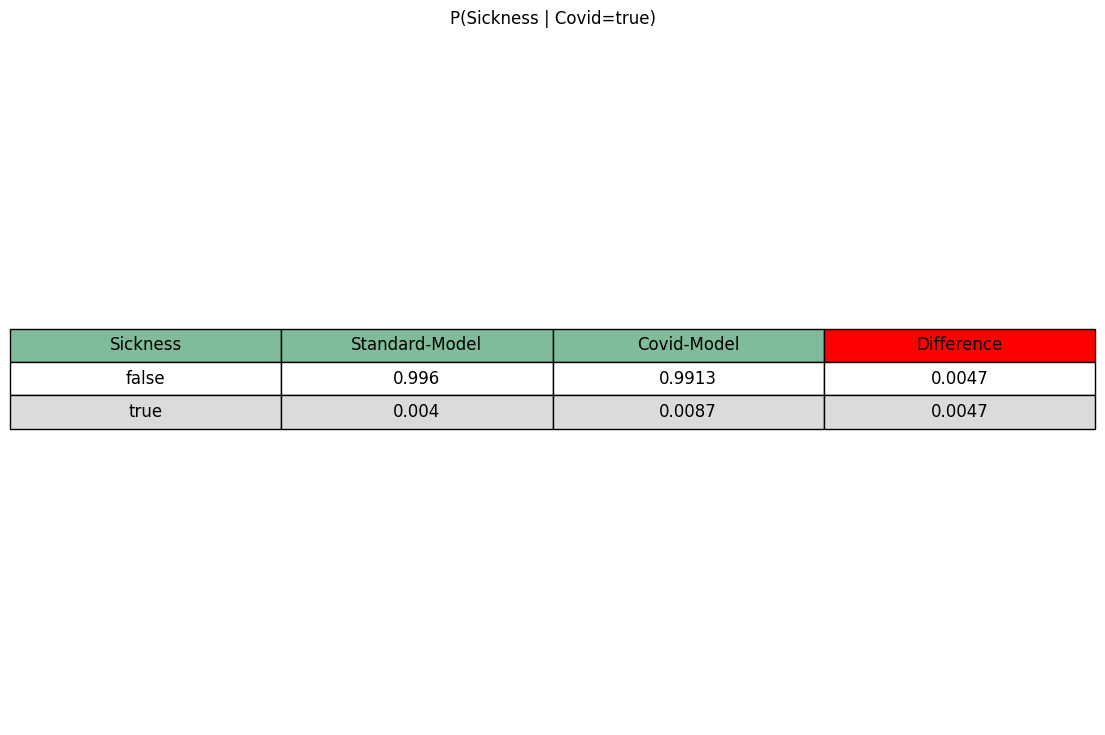

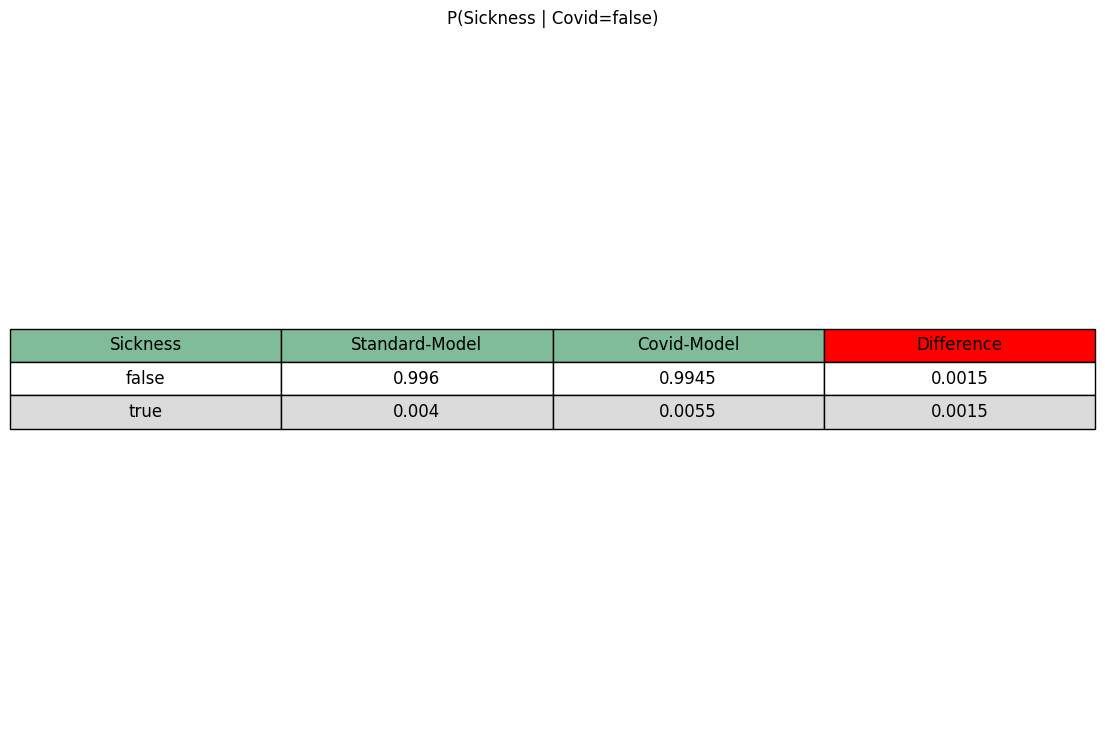

In [25]:
plot_tables(models_covid, ["Sickness"], {"Covid":"true"}, error=True, err_label="Difference")
plot_tables(models_covid, ["Sickness"], {"Covid":"false"}, error=True, err_label="Difference")

We can make almost the same considerations as above: of course <i>Covid</i>= True increases <i>Death</i> probability, but also with <i>Covid</i>= False assignment, we can see differences between the two models, given by the absence of a (Covid, Death) edge and the higher chances of <i>Death</i> in the Covid-model, just because of the existence of Covid in <i>that world</i>.

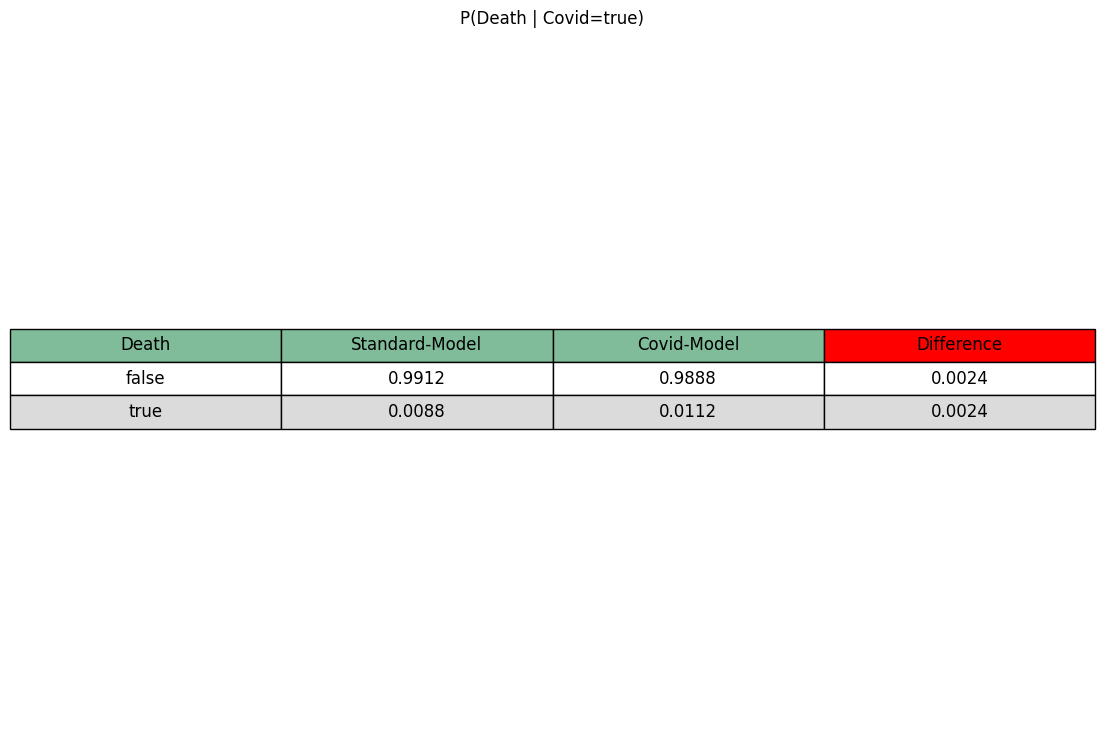

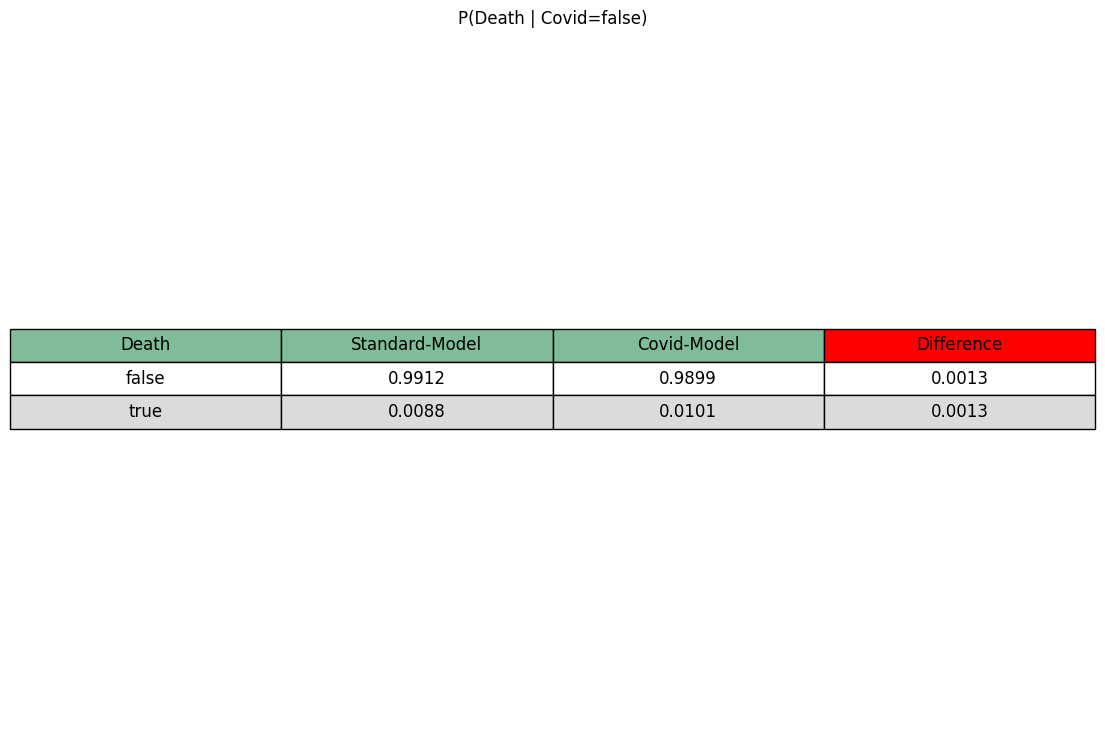

In [26]:
plot_tables(models_covid, ["Death"], {"Covid":"true"}, error=True, err_label="Difference")
plot_tables(models_covid, ["Death"], {"Covid":"false"}, error=True, err_label="Difference")

### Comparison \#2
In this second and last part of comparison we will compare the Standard-model and the Dataset-model. The aim is to compare and spot some real differences between the models built via the BIF file (containing real probabilities) and the dataset generated via Prior-Sampling. Let's have some tests.



We are now comparing the probability of Gender given the following evidences:
- Death=true

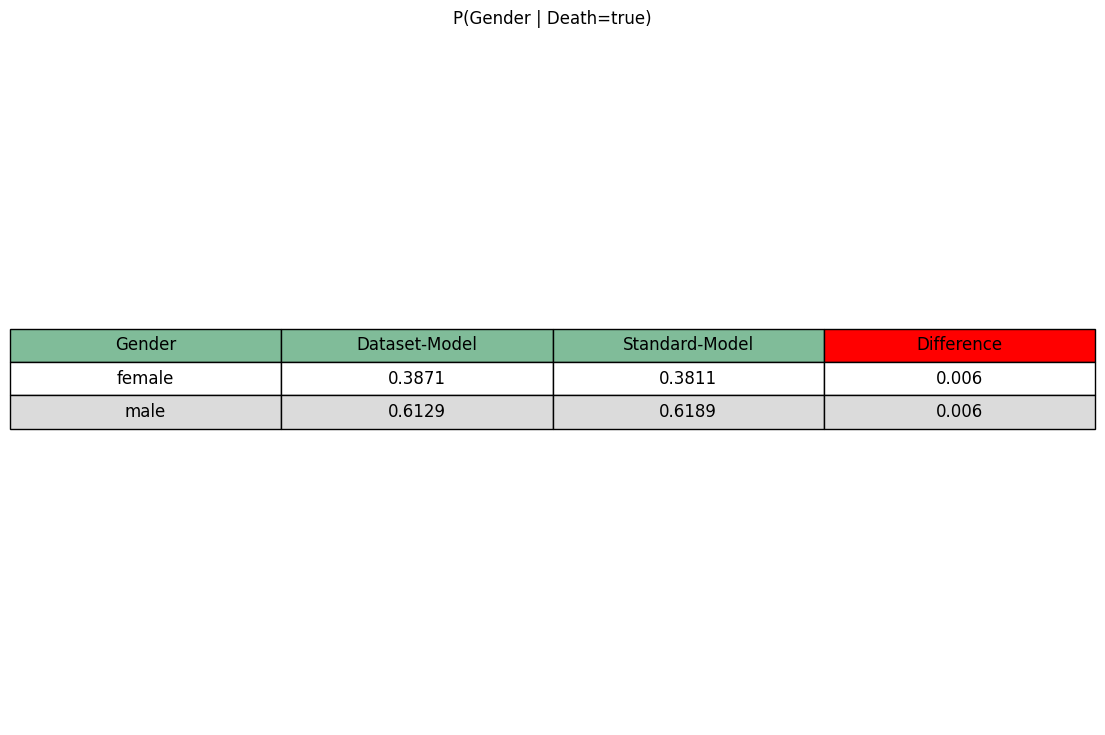

In [27]:
plot_tables(models_st_ds, ["Gender"], {"Death":"true"}, error=True, err_label="Difference")

Here there are some other interesting queries.

As we can see in every comparison the difference between Dataset-model and Standard-model is very low.\
Please note that Standard-model contains the probabilites calibrated on the entire population, whilst the Dataset-model only conatins 1 million entries (we tried to generate a dataset with 10 millions entries but Kernel died during the processing of data R.I.P.) 

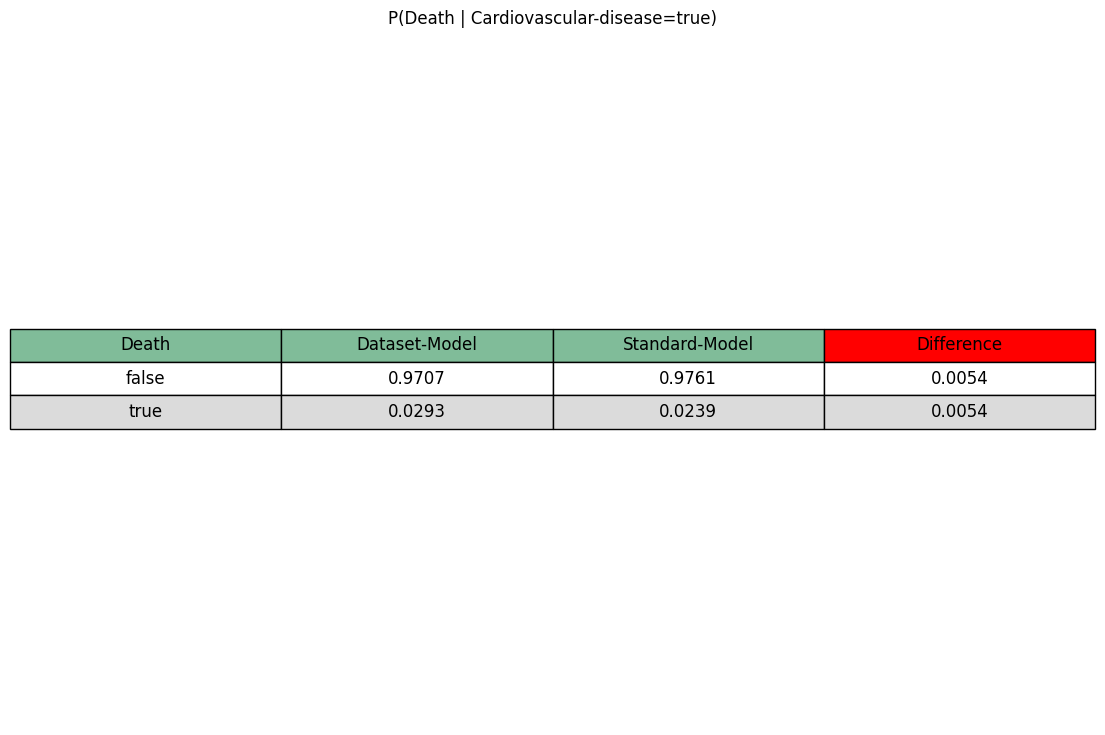

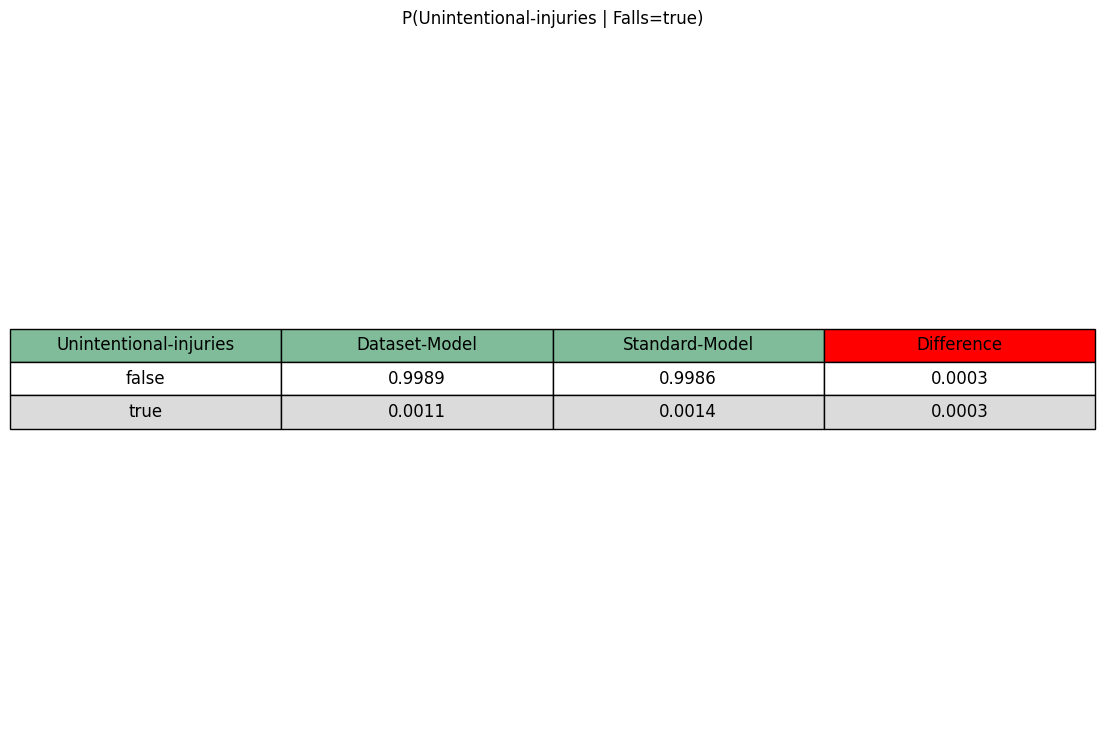

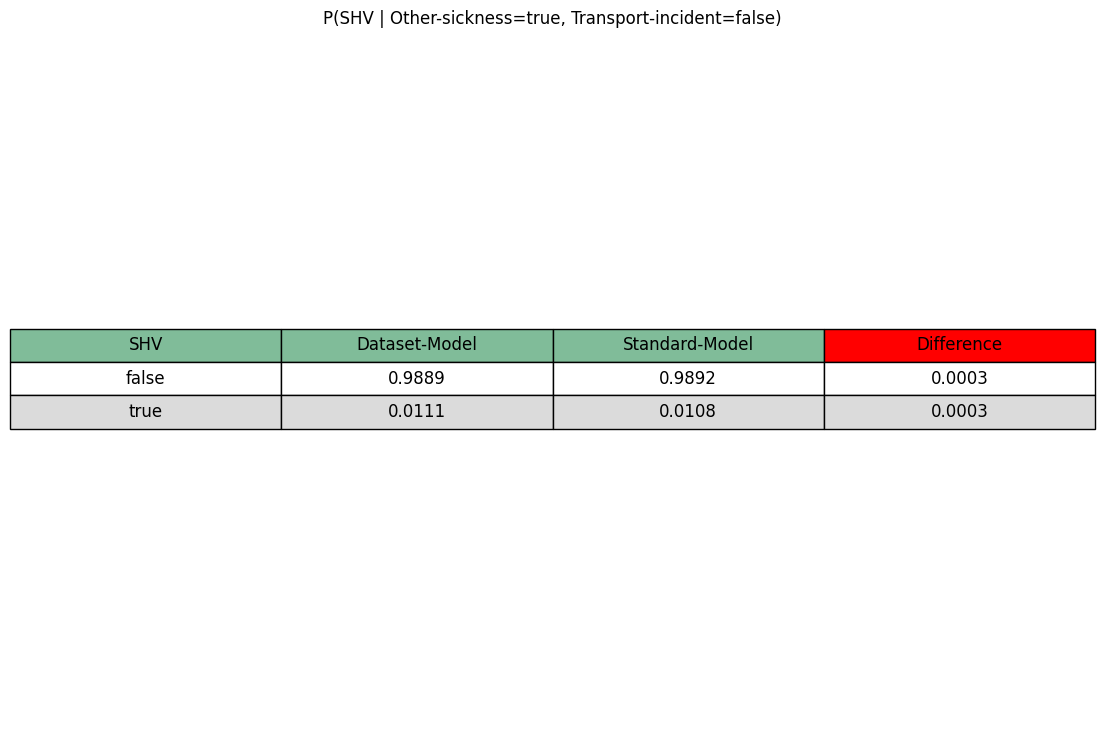

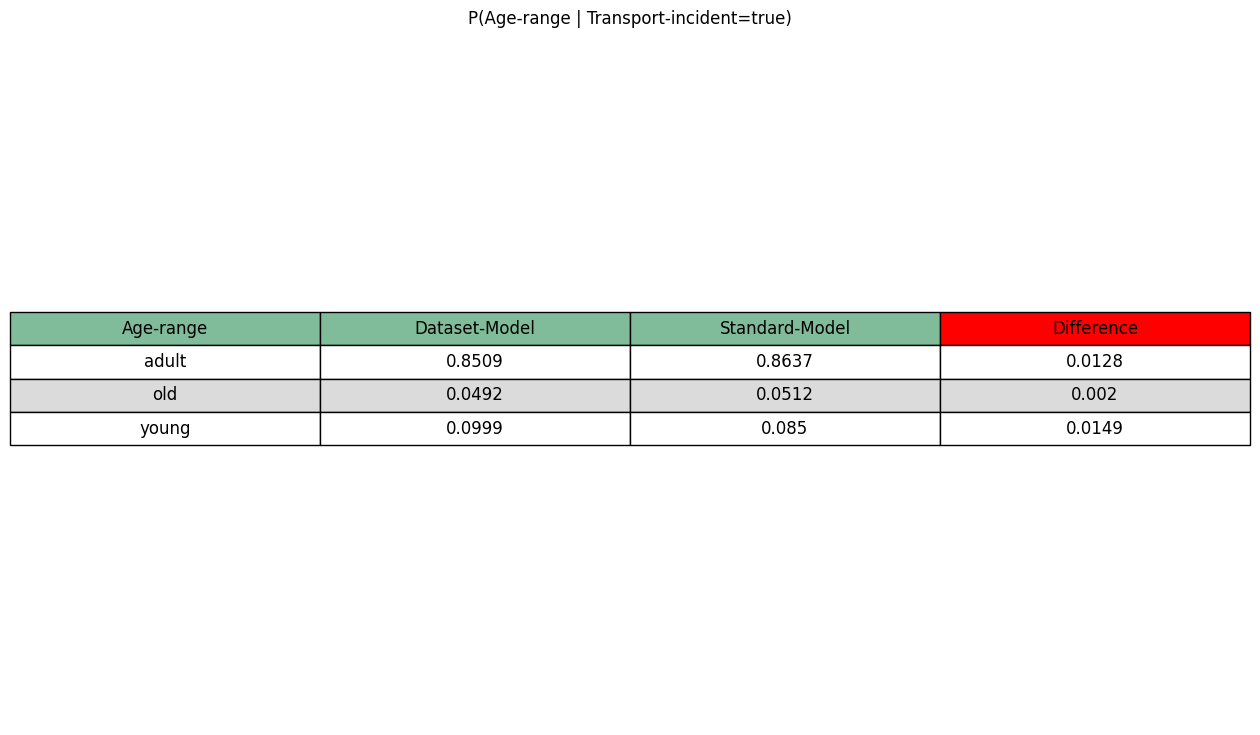

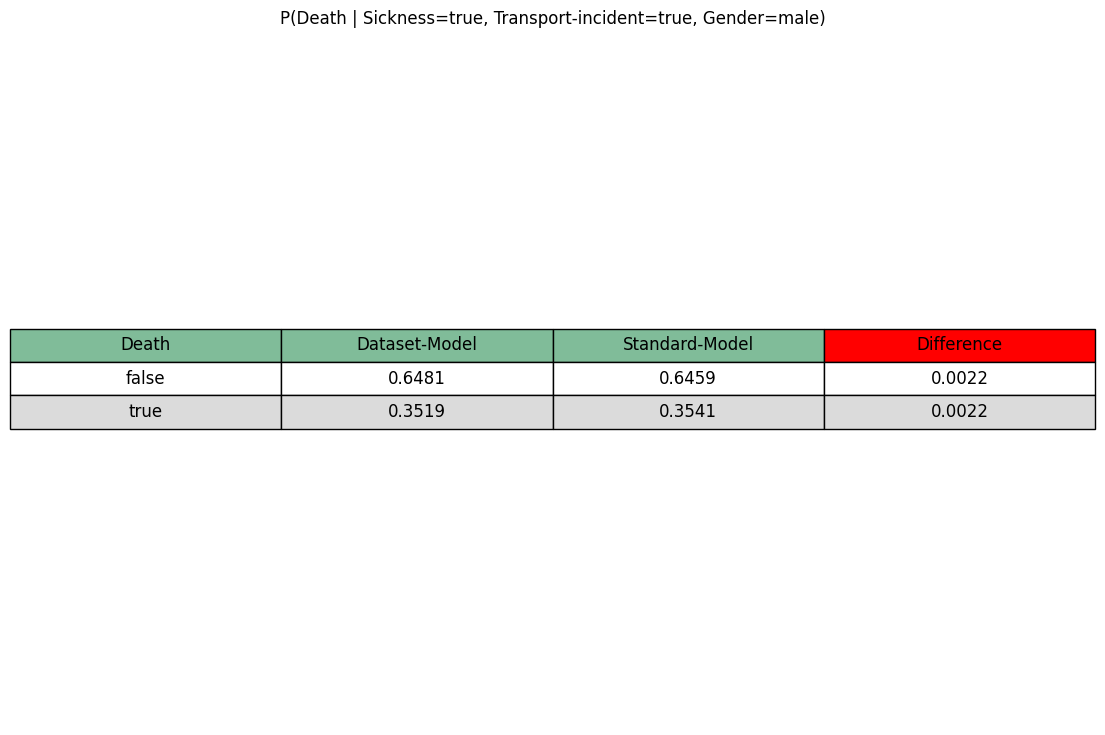

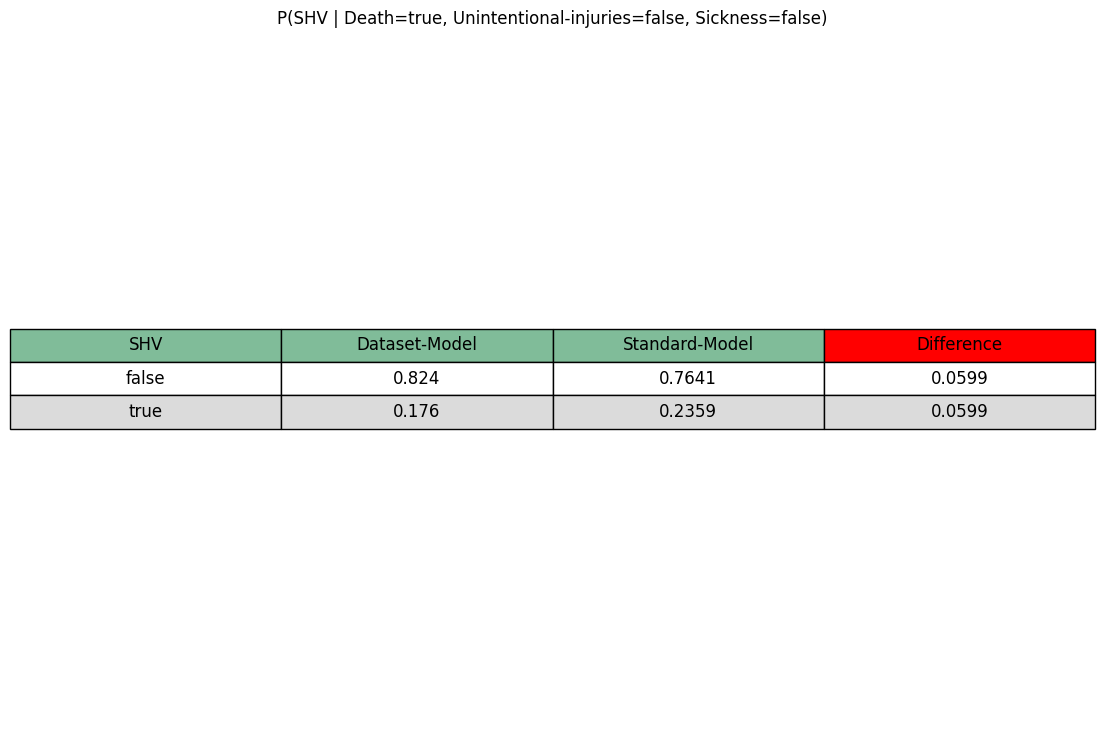

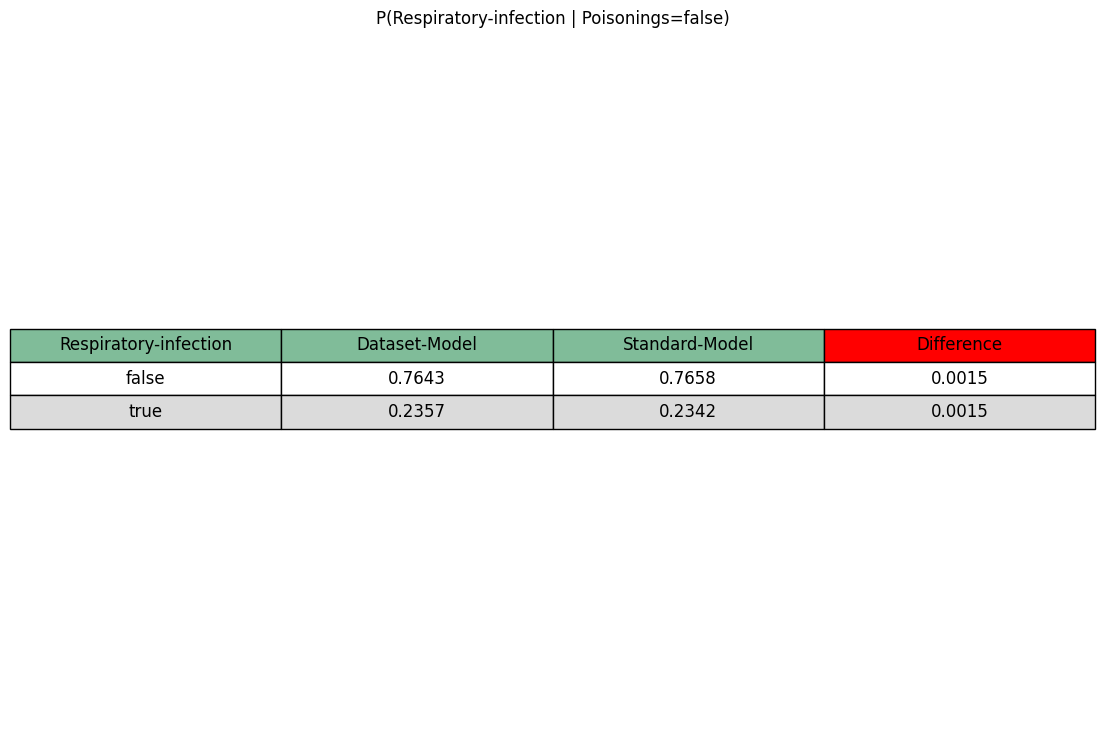

In [28]:
plot_tables(models_st_ds, ["Death"], {"Cardiovascular-disease":"true"}, error=True, err_label="Difference")
plot_tables(models_st_ds, ["Unintentional-injuries"], {"Falls":"true"}, error=True, err_label="Difference")
plot_tables(models_st_ds, ["SHV"], {"Other-sickness":"true", "Transport-incident":"false"}, error=True, err_label="Difference")
plot_tables(models_st_ds, ["Age-range"], {"Transport-incident":"true"}, error=True, err_label="Difference")
plot_tables(models_st_ds, ["Death"], {"Sickness":"true", "Transport-incident":"true", "Gender":"male"}, error=True, err_label="Difference")
plot_tables(models_st_ds, ["SHV"], {"Death":"true", "Unintentional-injuries": "false", "Sickness":"false"}, error=True, err_label="Difference")
plot_tables(models_st_ds, ["Respiratory-infection"], {"Poisonings":"false"}, error=True, err_label="Difference")